# **Table of Contents**

1.   Table of contents

2.   Bibliography

3.   Contexte

4.   Crisp : Cross-industry standard process for data mining

     1. Business Understanding 

       1.1. Business Understanding Overview 

       1.2. Determining Business Objectives 

       1.3. Assessing the Situation

       1.4. Determining Data Mining Goals

       1.5. Producing a Project Plan

    2. Data Understanding :

       2.1. Collecting Initial Data

   3. Data Preparation







# **Bibliography**

. Consignes : https://openclassrooms.com/fr/projects/631/assignment

. Données : https://s3-eu-west-1.amazonaws.com/static.oc-static.com/prod/courses/files/Parcours_data_scientist/Projet+-+Textimage+DAS+V2/Dataset+projet+pre%CC%81traitement+textes+images.zip

. Transfer Learning : https://machinelearningmastery.com/how-to-use-transfer-learning-when-developing-convolutional-neural-network-models/

. ORB: https://fr.acervolima.com/correspondance-de-fonctionnalites-a-laide-de-lalgorithme-orb-dans-python-opencv/

. SIFT: https://en.wikipedia.org/wiki/Scale-invariant_feature_transform


# **Contexte**

The "Marketplace" company wishes to launch an e-commerce marketplace.

In the Marketplace, sellers offer items to buyers by posting a photo and description.

Currently, the assignment of an item's category is done manually by sellers and is therefore unreliable. In addition, the volume of articles is currently very small.

To make the user experience for sellers (making it easier to put new items online) and buyers (making it easier to find products) as smooth as possible and with a view to scaling up, it becomes necessary to 'automate this task.

Linda, lead data scientist, asks us, as data scientist at "Place de marché", to study the feasibility of an engine for classifying articles into different categories, with a sufficient level of precision.

Our mission is to carry out a first feasibility study of an article classification engine based on an image and a description for the automation of the attribution of the article category.

We will analyze the dataset by preprocessing images and product descriptions, dimension reduction, then clustering. The results of the clustering will be presented in the form of a two-dimensional representation to be determined, which will illustrate the fact that the characteristics extracted make it possible to group together products of the same category.

# **Crisp: Cross-industry standard process for data mining**

CRISP-DM, which stands for Cross-Industry Standard Process for Data Mining,is an industry-proven way to guide your data mining efforts.

. As a methodology, it includes descriptions of the typical phases of a 
project, the tasks involved with each phase, and an explanation of the 
relationships between these tasks.

. As a process model, CRISP-DM provides an overview of the data mining life cycle.

# **1. Business Understanding**

### 1.1. **Determining Business Objectives**

**Describe Problem Area**

For the Marketplace business, assignment of an item's category is done manually by sellers and is therefore unreliable.
"Marketplace" wants to automate this task. Hence a feasibility study of an article classification engine based on an image and description for automating the attribution of the article category will be carried out.

**Defining Business Objectives**

* Clustering allowing the products of the same category to be properly grouped.

* Conclusion on the feasibility of the classification engine and recommendations for its eventual creation.

### **1.3. Assessing the Situation**

**Data**

The company provides a database containing information on identifier (id, name, product category, brand, description), price and sale price, image, product note, etc ...

**Risks and Contingencies**

It is also wise to consider possible risks over the course of the 
project. Types of risks include:

* Scheduling (What if the project takes longer than anticipated?)
The scope of the project should be reduced.

* Data (What if the data are of poor quality or coverage?)
We have to analyze the database well and determine by feature 
engineering the best possible features, otherwise look for other data 
of better quality and high coverage.

* Results (What if the initial results are less dramatic than expected?)
In this case we have to look for the problem and try other tracks

**Terminology**

Classification is simply putting a label on a text or an image, making it belong to a well-defined group or class.

SIFT: The scale-invariant feature transform (SIFT), which can be translated as "scale-invariant visual characteristic transformation", is an algorithm used in the field of computer vision to detect and identify similar elements between different digital images (elements of landscapes, objects, people, etc.)

SURF: Speeded Up Robust Features, which can be translated as accelerated robust features, is a feature detection algorithm and descriptor. It is used in the field of computer vision, for object detection or reconstruction tasks.

ORB: is an efficient alternative to SIFT or SURF algorithms used for feature extraction, computational cost, performance matching, and primarily patents. SIFT and SURF are patented and you are expected to pay them for its use.

R-CNN: The Region with Convolutional Neural Networks (R-CNN) algorithm is an object detection algorithm that segments the input image to find bounding areas relevant, then run a detection algorithm.

### **1.4. Determining Data Mining Goals** 

**Data Mining Goals**

* A preprocessing of the images and descriptions of the products.
* A reduction in size.
* Clustering which will enable products of the same category to be properly grouped: The results of clustering will be presented in the form of a two-dimensional representation to be determined.

* To extract the features, it is necessary to implement at least a SIFT / ORB / SURF type algorithm.

* A CNN Transfer Learning type algorithm can optionally be used as a complement, if it can shed additional light on the demonstration.

**Data Mining Success Criteria**

 * The methods for model assessment : silhouette coefficient, homogeneity_score, ARI, Accuracy.
 * well-defined clusters.

### **1.5. Producing a Project Plan**

**Project Plan**

Phase                 : Time       : Resources          : Risks

Business understanding: 2 days     : Market place's
                                    data                : Economic 
                                                          change

Data understanding    : 2 days     : Market place's 
                                    data                : Data problems,
                                                          technology 
                                                          problems

Data preparation      : 2 weeks    : Market place's 
                                    data
                                                        : Data problems,
                                                          technology 
                                                          problems


Modeling              : 2 weeks     : Market place's 
                                    data
                                                         : Technology 
                                                           problems
                                                           models

Evaluation            : 1 week     : Market place's 
                                    data                 : Economic     
                                                           change,
                                                          inability to                                                                 implement results   

 
## **2. Data Understanding** 

### **2.1. Collecting Initial Data**

**Data Collection Report**

It is a database containing information on identifier (id, name, product category, brand, description, price and sale price, image, product note,..).

Product category, image and description seem to be the most promising. 

We can use this data to derive other variables that can be very 
interesting in our clustering.



# **Librairies and dataframe's Import**

In [ ]:
# Common libraries for ML
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import os
from os import listdir
import time
import scipy.stats
from pylab import figure, text, scatter, show
import re
import warnings
warnings.filterwarnings('ignore')


# Regressors
from sklearn.cluster import KMeans
from scipy.cluster.vq import kmeans, vq
from sklearn.model_selection import train_test_split

# Pipeline
from sklearn.pipeline import Pipeline

# Preprocessing
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler


# Image processing
import cv2 
from matplotlib.pyplot import imread
from IPython.display import Image
from scipy.ndimage import gaussian_filter
from PIL import Image as Image_PIL
from PIL import Image, ImageOps
from PIL import ImageFilter
from PIL import Image as PImage
import matplotlib.image as mpimg
!pip install opencv-contrib-python

# Size reduction 
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

# Metrics 
from sklearn.metrics import adjusted_rand_score
from sklearn.metrics import confusion_matrix, f1_score
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn import cluster, metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics.cluster import homogeneity_score
from sklearn.metrics import silhouette_score

# Textual data processing
import nltk
from wordcloud import WordCloud, STOPWORDS
from nltk.tokenize import RegexpTokenizer
from nltk.stem.snowball import SnowballStemmer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
!pip install beautifulsoup4
from bs4 import BeautifulSoup
import requests
import string
from nltk.stem import WordNetLemmatizer
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('words')
nltk.download('wordnet')
!pip install zeugma &> /dev/null
from zeugma import TextsToSequences
!pip install wordcloud
from ipywidgets import IntProgress
from ipywidgets import Text

# Keras 
import keras
from keras.preprocessing.image import load_img 
from keras.preprocessing.image import img_to_array 
from keras.applications.vgg16 import preprocess_input 
from keras.applications.vgg16 import VGG16 
from keras.models import Model
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_csv(
'/content/drive/MyDrive/Colab Notebooks/flipkart_com-ecommerce_sample_1050.csv',
low_memory=False)


___

## **Exploratory analysis**

In [ ]:
data.head(2)

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,55b85ea15a1536d46b7190ad6fff8ce7,2016-04-30 03:22:56 +0000,http://www.flipkart.com/elegance-polyester-mul...,Elegance Polyester Multicolor Abstract Eyelet ...,"[""Home Furnishing >> Curtains & Accessories >>...",CRNEG7BKMFFYHQ8Z,1899.0,899.0,55b85ea15a1536d46b7190ad6fff8ce7.jpg,False,Key Features of Elegance Polyester Multicolor ...,No rating available,No rating available,Elegance,"{""product_specification""=>[{""key""=>""Brand"", ""v..."
1,7b72c92c2f6c40268628ec5f14c6d590,2016-04-30 03:22:56 +0000,http://www.flipkart.com/sathiyas-cotton-bath-t...,Sathiyas Cotton Bath Towel,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEGFZHGBXPHZUH,600.0,449.0,7b72c92c2f6c40268628ec5f14c6d590.jpg,False,Specifications of Sathiyas Cotton Bath Towel (...,No rating available,No rating available,Sathiyas,"{""product_specification""=>[{""key""=>""Machine Wa..."


In [ ]:
def data_details(data):

    """
    This function allows, for a data set, to present and view:
      - the number of lines
      - the number of columns
      - the type of data in each column
      - the column name
      - the number of unique values ​​in each column
      - A list containing the unique values ​​of each column, if
        the length of the list does not exceed 100 values
      - the number of missing values ​​in each column
      - the percentage of missing values ​​in each column 

    """
 
    print(f'Dataset contains {data.shape [0]} rows and {data.shape[1]}colonnes')
    columns = data.columns

    Nan_counts=data.isnull().sum().tolist()
    Nan_ratio=(data.isnull().sum()/len(data)).values

    Type = data.dtypes.tolist()
    count = [len(data[i].unique()) for  i  in columns]
       
    df = pd.DataFrame({'Columns name':columns, 
                                 'Type':Type, 
                                 '# unique values':count,
                                 '# Nan values':Nan_counts,
                                 '% Nan values':Nan_ratio * 100
                                 })
    return df

def data_summary(data):
  """
 This function provides a summary of the dataset:
    - the number of lines
    - the number of columns
    - the number of datatype of the columns
    - the percentage of missing values ​​in the dataset   
  """
  
  total_per_missing_data = (data.isnull().sum()/len(data)).values.\
  sum()/data.shape[1]*100
  
  df= pd.DataFrame({'# Columns':data.shape[1],
                    '# Rows':data.shape[0],
                    '# Col Types':data.dtypes.nunique(),
                    'Col Types and #':[[(index,count) for count, index in 
                                        zip(data.dtypes.value_counts(),
                                            data.dtypes.value_counts().index)
                                        ]],
                    'Nan total %':total_per_missing_data
                    })
  return df

def data_plot(x):
  plt.figure(figsize=(5, 5))
  plt.pie(x=np.squeeze(x), 
          labels = ['% missing value', '% non-missing value'],
          autopct='%1.1f%%',
          explode=(0, 0.1),
          shadow=True, 
          startangle=0,
          )
  plt.title('% total Nan in the dataset')
  plt.legend(title="Legend",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))
  plt.show()


def data_presentation(data):
  """
  This function provides a representation of the dataset   
  """
  print()
  print()
  print('Display the first 5 rows of the dataset')
  print()
  print()
  display(data.head())
  
  print()
  print()
  print('Display the last 5 rows of the dataset')
  print()
  print()
  display(data.tail())

  print()
  print()
  print('Display a summary of the dataset')
  print()
  print()
  df_summary = data_summary(data)
  display(df_summary)

  
  print()
  print()
  print('Display a summary of the columns of the dataset')
  print()
  print()
  df_details = data_details(data)
  display(df_details)

  print()
  print()
  print('Display a summary of the types of columns in the dataset')
  print()
  print()
  display(df_details.Type.value_counts().to_frame())
  
  print()
  print()
  print('Percentage of missing values ​​in the dataset')
  print()
  print()
  data_plot([df_summary.iloc[:,-1], 
             100 - df_summary.iloc[:,-1]]
            )
  
  return None


def shape_details(df):
  print(f"Number of lines : {df.shape[0]}")
  print(f"Number of columns : {df.shape[1]}")
  return None

def data_checking(df):
  """
  Get information related to the data frame data as:
  - Head
  - Tail
  - Missing values percentage and numbers 
  - Number of unique values
  - Number of different columns type   

  """

  shape_details(df)
  print(100*'__')
  print(100*'__')
  data_presentation(df)
  print(100*'__')
  print(100*'__')
  msno.bar(df)



Number of lines : 1050
Number of columns : 15
________________________________________________________________________________________________________________________________________________________________________________________________________
________________________________________________________________________________________________________________________________________________________________________________________________________


Display the first 5 rows of the dataset




,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,55b85ea15a1536d46b7190ad6fff8ce7,2016-04-30 03:22:56 +0000,http://www.flipkart.com/elegance-polyester-mul...,Elegance Polyester Multicolor Abstract Eyelet ...,"[""Home Furnishing >> Curtains & Accessories >>...",CRNEG7BKMFFYHQ8Z,1899.0,899.0,55b85ea15a1536d46b7190ad6fff8ce7.jpg,False,Key Features of Elegance Polyester Multicolor ...,No rating available,No rating available,Elegance,"{""product_specification""=>[{""key""=>""Brand"", ""v..."
1,7b72c92c2f6c40268628ec5f14c6d590,2016-04-30 03:22:56 +0000,http://www.flipkart.com/sathiyas-cotton-bath-t...,Sathiyas Cotton Bath Towel,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEGFZHGBXPHZUH,600.0,449.0,7b72c92c2f6c40268628ec5f14c6d590.jpg,False,Specifications of Sathiyas Cotton Bath Towel (...,No rating available,No rating available,Sathiyas,"{""product_specification""=>[{""key""=>""Machine Wa..."
2,64d5d4a258243731dc7bbb1eef49ad74,2016-04-30 03:22:56 +0000,http://www.flipkart.com/eurospa-cotton-terry-f...,Eurospa Cotton Terry Face Towel Set,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEG6SHXTDB2A2Y,NaN,NaN,64d5d4a258243731dc7bbb1eef49ad74.jpg,False,Key Features of Eurospa Cotton Terry Face Towe...,No rating available,No rating available,Eurospa,"{""product_specification""=>[{""key""=>""Material"",..."
3,d4684dcdc759dd9cdf41504698d737d8,2016-06-20 08:49:52 +0000,http://www.flipkart.com/santosh-royal-fashion-...,SANTOSH ROYAL FASHION Cotton Printed King size...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",BDSEJT9UQWHDUBH4,2699.0,1299.0,d4684dcdc759dd9cdf41504698d737d8.jpg,False,Key Features of SANTOSH ROYAL FASHION Cotton P...,No rating available,No rating available,SANTOSH ROYAL FASHION,"{""product_specification""=>[{""key""=>""Brand"", ""v..."
4,6325b6870c54cd47be6ebfbffa620ec7,2016-06-20 08:49:52 +0000,http://www.flipkart.com/jaipur-print-cotton-fl...,Jaipur Print Cotton Floral King sized Double B...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",BDSEJTHNGWVGWWQU,2599.0,698.0,6325b6870c54cd47be6ebfbffa620ec7.jpg,False,Key Features of Jaipur Print Cotton Floral Kin...,No rating available,No rating available,Jaipur Print,"{""product_specification""=>[{""key""=>""Machine Wa..."




Display the last 5 rows of the dataset




,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
1045,958f54f4c46b53c8a0a9b8167d9140bc,2015-12-01 10:15:43 +0000,http://www.flipkart.com/oren-empower-extra-lar...,Oren Empower Extra Large Self Adhesive Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",STIE88ZGTX65GH4V,1399.0,999.0,958f54f4c46b53c8a0a9b8167d9140bc.jpg,False,Oren Empower Extra Large Self Adhesive Sticker...,No rating available,No rating available,Oren Empower,"{""product_specification""=>[{""key""=>""Number of ..."
1046,fd6cbcc22efb6b761bd564c28928483c,2015-12-01 10:15:43 +0000,http://www.flipkart.com/wallmantra-large-vinyl...,Wallmantra Large Vinyl Sticker Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",STIEC889ZD5GDCVQ,4930.0,1896.0,fd6cbcc22efb6b761bd564c28928483c.jpg,False,Wallmantra Large Vinyl Sticker Sticker (Pack o...,No rating available,No rating available,Wallmantra,"{""product_specification""=>[{""key""=>""Number of ..."
1047,5912e037d12774bb73a2048f35a00009,2015-12-01 10:15:43 +0000,http://www.flipkart.com/uberlyfe-extra-large-p...,Uberlyfe Extra Large Pigmented Polyvinyl Films...,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",STIE5UVGW2JWVWCT,4500.0,1449.0,5912e037d12774bb73a2048f35a00009.jpg,False,Buy Uberlyfe Extra Large Pigmented Polyvinyl F...,No rating available,No rating available,Uberlyfe,"{""product_specification""=>[{""key""=>""Number of ..."
1048,c3edc504d1b4f0ba6224fa53a43a7ad6,2015-12-01 10:15:43 +0000,http://www.flipkart.com/wallmantra-medium-viny...,Wallmantra Medium Vinyl Sticker Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",STIEC889ZGFD3RCE,3465.0,1333.0,c3edc504d1b4f0ba6224fa53a43a7ad6.jpg,False,Buy Wallmantra Medium Vinyl Sticker Sticker fo...,No rating available,No rating available,Wallmantra,"{""product_specification""=>[{""key""=>""Number of ..."
1049,f2f027ad6a6df617c9f125173da71e44,2015-12-01 10:15:43 +0000,http://www.flipkart.com/uberlyfe-large-vinyl-s...,Uberlyfe Large Vinyl Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",STIE2ZEPACRQJKH7,1190.0,595.0,f2f027ad6a6df617c9f125173da71e44.jpg,False,Buy Uberlyfe Large Vinyl Sticker for Rs.595 on...,4,4,Uberlyfe,"{""product_specification""=>[{""key""=>""Sales Pack..."




Display a summary of the dataset




,# Columns,# Rows,# Col Types,Col Types and #,Nan total %
0,15,1050,3,"[(object, 12), (float64, 2), (bool, 1)]",2.165079




Display a summary of the columns of the dataset


Dataset contains 1050 rows and 15colonnes


,Columns name,Type,# unique values,# Nan values,% Nan values
0,uniq_id,object,1050,0,0.000000
1,crawl_timestamp,object,149,0,0.000000
2,product_url,object,1050,0,0.000000
3,product_name,object,1050,0,0.000000
4,product_category_tree,object,642,0,0.000000
5,pid,object,1050,0,0.000000
6,retail_price,float64,355,1,0.095238
7,discounted_price,float64,425,1,0.095238
8,image,object,1050,0,0.000000
9,is_FK_Advantage_product,bool,2,0,0.000000




Display a summary of the types of columns in the dataset




,Type
object,12
float64,2
bool,1




Percentage of missing values ​​in the dataset




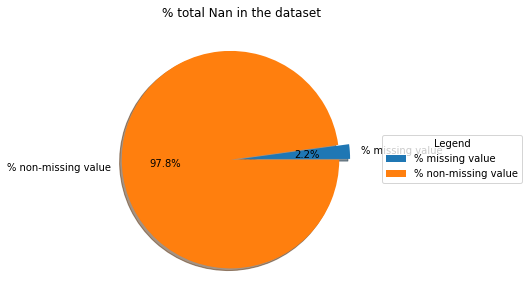

________________________________________________________________________________________________________________________________________________________________________________________________________
________________________________________________________________________________________________________________________________________________________________________________________________________


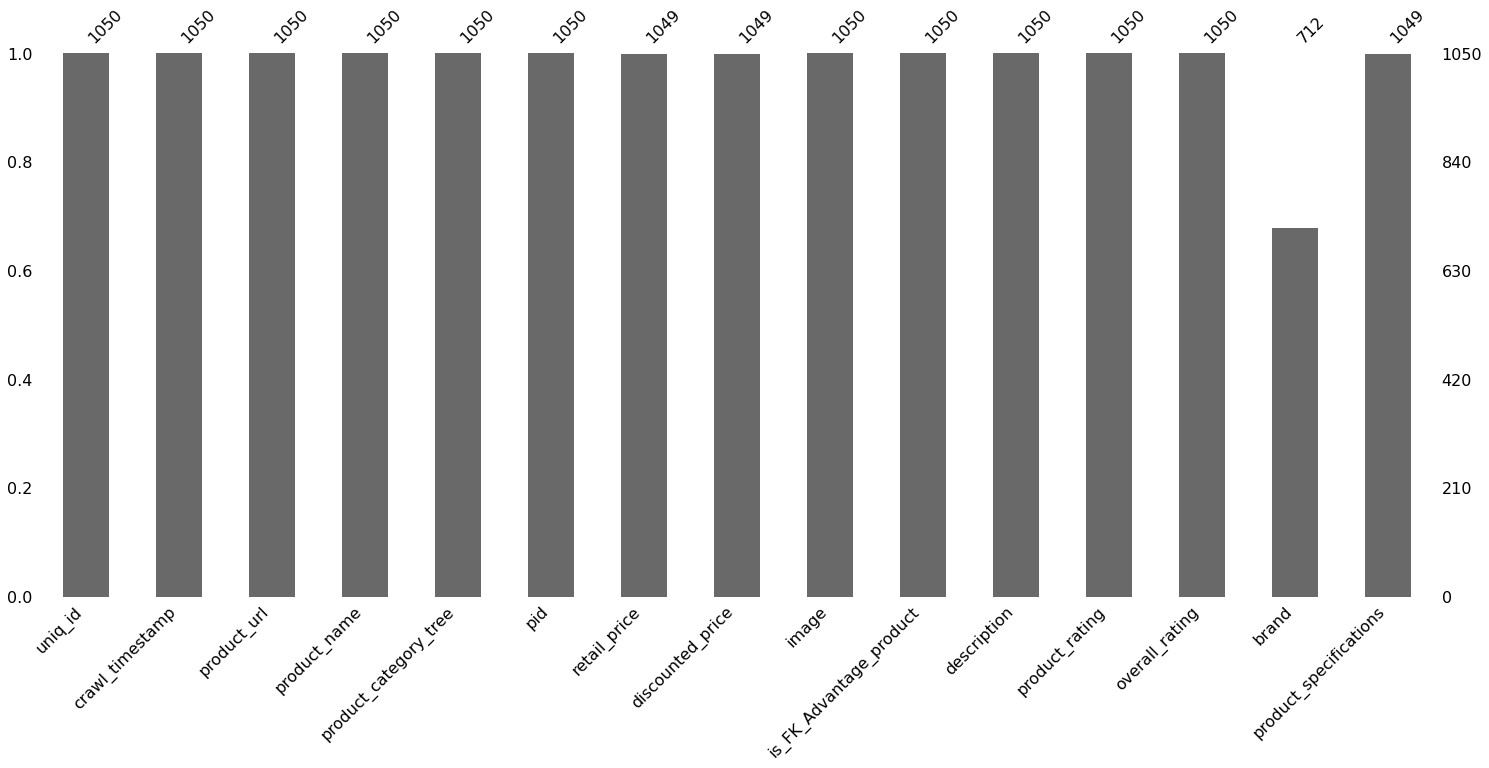

In [ ]:
data_checking(data)

In [ ]:
resultat = data.overall_rating.value_counts()
print(resultat)

No rating available    889
5                       43
4                       21
3                       12
1                       10
4.5                     10
4.3                      9
3.5                      8
3.7                      8
2                        6
4.2                      4
4.1                      4
2.3                      3
3.6                      3
3.8                      3
4.7                      3
4.4                      3
4.8                      2
2.7                      1
3.2                      1
2.5                      1
3.9                      1
3.1                      1
1.5                      1
2.2                      1
3.3                      1
4.9                      1
Name: overall_rating, dtype: int64


In [ ]:
resultat = data.product_rating.value_counts()
print(resultat)

No rating available    889
5                       43
4                       21
3                       12
1                       10
4.5                     10
4.3                      9
3.5                      8
3.7                      8
2                        6
4.2                      4
4.1                      4
2.3                      3
3.6                      3
3.8                      3
4.7                      3
4.4                      3
4.8                      2
2.7                      1
3.2                      1
2.5                      1
3.9                      1
3.1                      1
1.5                      1
2.2                      1
3.3                      1
4.9                      1
Name: product_rating, dtype: int64


In [ ]:
data.isna().sum()

uniq_id                      0
crawl_timestamp              0
product_url                  0
product_name                 0
product_category_tree        0
pid                          0
retail_price                 1
discounted_price             1
image                        0
is_FK_Advantage_product      0
description                  0
product_rating               0
overall_rating               0
brand                      338
product_specifications       1
dtype: int64

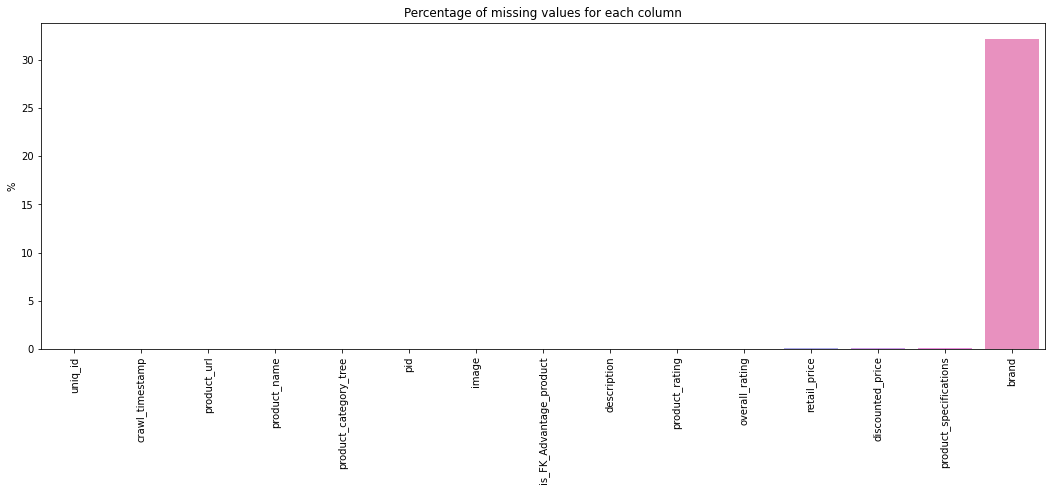

In [ ]:
# Calculation of missing values
null_prop = data.isna().sum(axis=0).sort_values()/len(data)*100

# Displays the proportion of missing data by column
fig = plt.figure(figsize=(18, 6))
sns.barplot(x=null_prop.index, y=null_prop.values)
plt.ylabel("%")
plt.title("Percentage of missing values ​​for each column")
plt.style.use('ggplot')
plt.xticks(rotation=90)
plt.show()

We notice:
- There are 355 'retail_price' for 1050 different products.
- There are 425 'discounted_price' for 1050 different products.
- There are 27 'product_rating' and 'overall_rating' for the 1050 different products.
- There are 338 missing values ​​for the 'brand' variable which must be filled.
- There are 985 'product_specifications' for 1050 different products so there are repeated 'product_specifications'.
- The 'product_rating' and 'overall_rating' variables are identical, from where one can be deleted, each one contains 889 'No rating available'. 85% of the values ​​in these two variables are 'No rating available' so it is better to remove them.
- Variables 'crawl_timestamp', 'product_url' and 'pid' seem irrelevant in the following analysis, so we will delete them.

After this analysis, we will delete the variables that seem irrelevant in the following analysis.

In [ ]:
data = data.drop(data[['crawl_timestamp', 'pid']],axis=1)

**Variable 'product_rating' and 'overall_rating'**

We will delete 'product_rating' and 'overall_rating' variables due to the large number of missing values ​​(85%).

In [ ]:
data = data.drop(data[['product_rating','overall_rating']], axis=1)

**Variable 'product_category_tree'**

We will split the content of the 'product_category_tree' variable into 3 levels to make it clearer.

In [ ]:
data['product_category_tree'].iloc[5]

'["Watches >> Wrist Watches >> Maserati Time Wrist Watches"]'

Each image is categorized by a system of trees at several depths.

In [ ]:
def split_categories(category, level):

    '''Function that displays different categories '''
    
    category = category.split('["')[1].split('"]')[0]
    cat = category.split(' >> ')
    if(len(cat)) < 3:
        cat = [cat[0], cat[1], 'None']
        if(len(cat))<2:
            cat = [cat[0], 'None', 'None']
    return cat[level]

def split_categories_1(category):
    return split_categories(category,0)
def split_categories_2(category):
    return split_categories(category,1)
def split_categories_3(category):
    return split_categories(category,2)

def detail_categories(dataframe):
    dataframe['cat_lvl_1'] = dataframe['product_category_tree'].apply(
        split_categories_1)
    dataframe['cat_lvl_2'] = dataframe['product_category_tree'].apply(
        split_categories_2)
    dataframe['cat_lvl_3'] = dataframe['product_category_tree'].apply(
        split_categories_3)
    return dataframe.drop(['product_category_tree'], axis=1)

In [ ]:
data = detail_categories(data)

In [ ]:
data.head(2)

,uniq_id,product_url,product_name,retail_price,discounted_price,image,is_FK_Advantage_product,description,brand,product_specifications,cat_lvl_1,cat_lvl_2,cat_lvl_3
0,55b85ea15a1536d46b7190ad6fff8ce7,http://www.flipkart.com/elegance-polyester-mul...,Elegance Polyester Multicolor Abstract Eyelet ...,1899.0,899.0,55b85ea15a1536d46b7190ad6fff8ce7.jpg,False,Key Features of Elegance Polyester Multicolor ...,Elegance,"{""product_specification""=>[{""key""=>""Brand"", ""v...",Home Furnishing,Curtains & Accessories,Curtains
1,7b72c92c2f6c40268628ec5f14c6d590,http://www.flipkart.com/sathiyas-cotton-bath-t...,Sathiyas Cotton Bath Towel,600.0,449.0,7b72c92c2f6c40268628ec5f14c6d590.jpg,False,Specifications of Sathiyas Cotton Bath Towel (...,Sathiyas,"{""product_specification""=>[{""key""=>""Machine Wa...",Baby Care,Baby Bath & Skin,Baby Bath Towels


In [ ]:
df = data[['cat_lvl_1','cat_lvl_2', 'cat_lvl_3']]

In [ ]:
# Number of unique categories
for col in df.columns:
    print('{} unique categories in {}'.format(df[col].nunique(), col))

7 unique categories in cat_lvl_1
62 unique categories in cat_lvl_2
242 unique categories in cat_lvl_3


Categories 2 and 3 are deleted because of the too high cardinality.

In [ ]:
data = data.drop(data[['cat_lvl_3', 'cat_lvl_2']], axis=1)

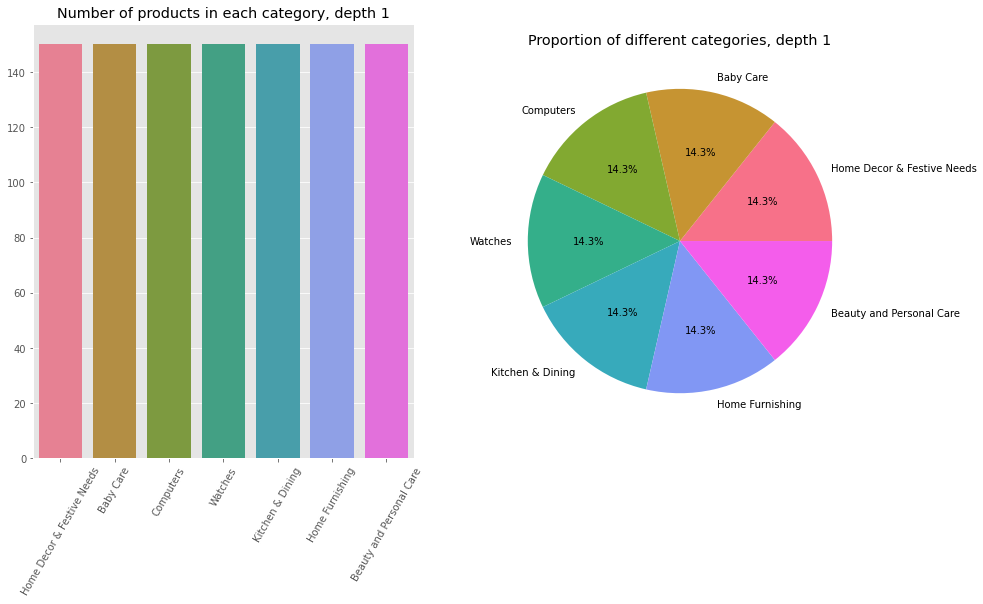

In [ ]:
# Histogram and Pieplot of the distribution of categories in depth 1: category_1
fig = plt.figure(1, figsize=(15, 8))
category_1 = df["cat_lvl_1"].value_counts()
plt.title("Proportion of different categories")

sns.set_palette(sns.color_palette("husl", len(category_1)))

# Barplot
plt.subplot(1, 2, 1)
plt.title("Number of products in each category, depth 1")

sns.barplot(category_1.index, category_1.values, orient="v")
plt.xticks(rotation=60)

# Pieplot
plt.subplot(1, 2, 2)
plt.title("Proportion of different categories, depth 1")
            
plt.pie(category_1, labels=list(category_1.index), autopct='%1.1f%%')
plt.show()

We notice that the distribution of products is equal between the 7 differents categories ('Baby Care', 'Kitchen and Dining', 'Computers', 'Home Decor and Festive Needs', 'Beauty and Personal Care', 'Watches' , 'Home Furnishing').

In [ ]:
print(category_1)

Home Decor & Festive Needs    150
Baby Care                     150
Computers                     150
Watches                       150
Kitchen & Dining              150
Home Furnishing               150
Beauty and Personal Care      150
Name: cat_lvl_1, dtype: int64


We notice that the distribution of the different products is very unequal in the components of the 2nd category, but the most present are the Wrist Watches, Laptop Accessories and Infant Wear.

**Variables 'retail_price' and 'discounted_price'**

In [ ]:
def joint_hist_boxplot(df, col, plot_type='log_scale',
                       log_scale=[True, False], kde=False, 
                       set_yscale='linear', set_xscale='symlog',
                       figsize=(10, 10)):
    # Creating a figure composed of two matplotlib.
    # Axes objects (ax_box and ax_hist)
    df=df.dropna(subset=[col])
    f, (ax_box, ax_hist) = plt.subplots(nrows=2, 
                                        sharex=True, 
                                        gridspec_kw={"height_ratios":(.15, .85)}
                                        ,
                                        figsize=figsize)

    # Graphic properties (not very important)    
    medianprops = {'color':"black"}
    meanprops = {'marker':'o', 'markeredgecolor':'black',
                'markerfacecolor':'firebrick'}
        
    # Assigning a graph to each ax
    _ = sns.boxplot(data=df, x=col, 
                    showfliers=True, 
                    medianprops=medianprops, 
                    showmeans=True, 
                    meanprops=meanprops, 
                    ax=ax_box)
    
    _ = sns.histplot(data=df, 
                     x=col,  
                     kde=kde, 
                     ax=ax_hist)
    # Remove x axis name for the boxplot
    ax_box.set(xlabel='')
    plt.subplots_adjust(top=0.9)
    plt.suptitle('Distribution de la variable ' + col)
    plt.show()

    # Calculate variable stats
    df_stats = df[col].describe().to_frame()
    print()
    display(df_stats)
    print('-'*100)
    print('-'*100)


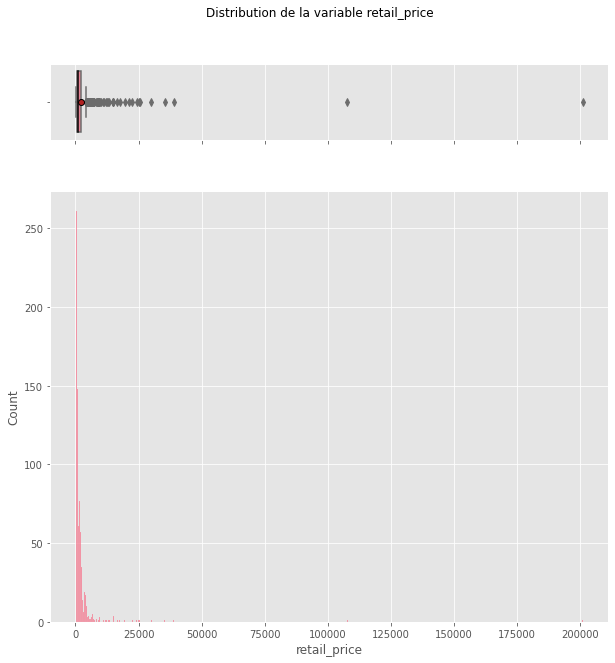

,retail_price
count,1049.000000
mean,2186.197331
std,7639.229411
min,35.000000
25%,555.000000
50%,999.000000
75%,1999.000000
max,201000.000000


----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------


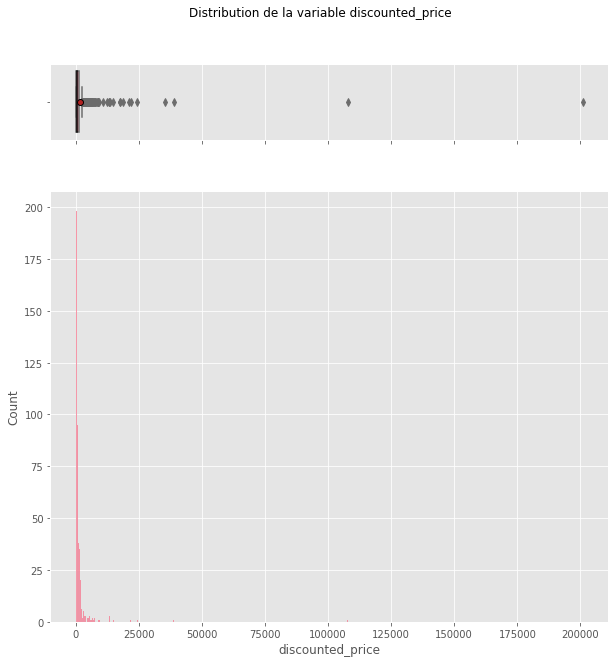

,discounted_price
count,1049.000000
mean,1584.527169
std,7475.099680
min,35.000000
25%,340.000000
50%,600.000000
75%,1199.000000
max,201000.000000


----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------


In [ ]:
for col in data.select_dtypes(include=np.number).columns:
    joint_hist_boxplot(data, col)

We notice that the two variables 'discounted_price' and 'retail_price' show a lot of outliers.

In [ ]:
data[data["retail_price"] == data["retail_price"].max()]

,uniq_id,product_url,product_name,retail_price,discounted_price,image,is_FK_Advantage_product,description,brand,product_specifications,cat_lvl_1
11,08452abdadb3db1e686b94a9c52fc7b6,http://www.flipkart.com/cartier-w6701005-analo...,"Cartier W6701005 Analog Watch - For Boys, Men",201000.0,201000.0,08452abdadb3db1e686b94a9c52fc7b6.jpg,False,"Cartier W6701005 Analog Watch - For Boys, Men...",NaN,"{""product_specification""=>[{""key""=>""Chronograp...",Watches


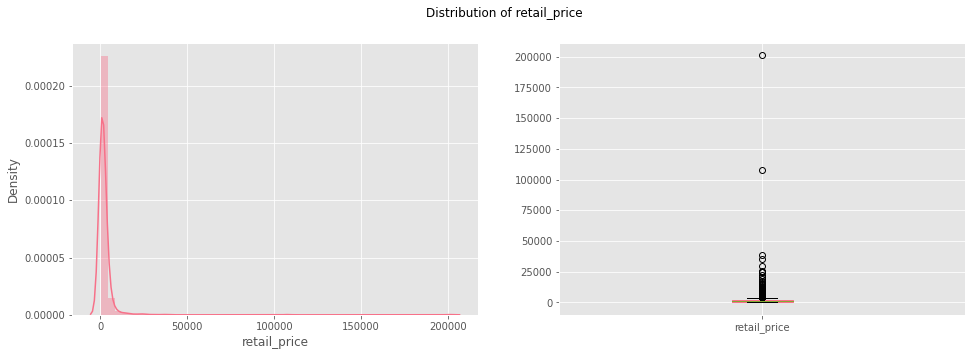

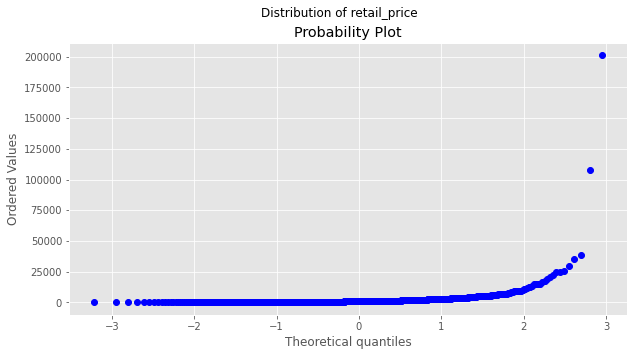

In [ ]:
plt.figure(1)

plt.subplot(121)
sns.distplot(data['retail_price'])
plt.suptitle('Distribution of retail_price')

plt.subplot(122)
data['retail_price'].plot.box(figsize=(16,5))

from scipy import stats
fig, ax = plt.subplots(figsize=(10, 5))
stats.probplot(data['retail_price'], plot=ax)
# We can plot a probability plot to see whether the values are normal. 

plt.suptitle('Distribution of retail_price')
plt.show()

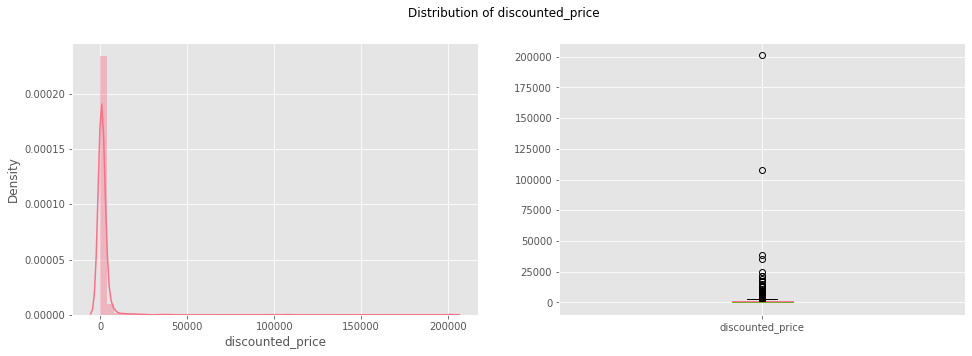

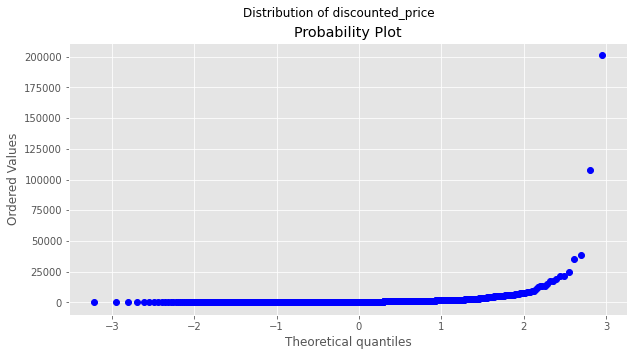

In [ ]:
plt.figure(1)

plt.subplot(121)
sns.distplot(data['discounted_price'])
plt.suptitle('Distribution of discounted_price')

plt.subplot(122)
data['discounted_price'].plot.box(figsize=(16,5))

from scipy import stats
fig, ax = plt.subplots(figsize=(10, 5))
stats.probplot(data['discounted_price'], plot=ax)
# We can plot a probability plot to see whether the values are normal. 


plt.suptitle('Distribution of discounted_price')
plt.show()

The distribution of the 'retail_price' and 'discounted_price' variables are abnormal . And the 2nd figure shows the presence of outliers that dont require correction because the are statistical oultiers.
The outliers of prices are explained by the great variability of products presented.

In [ ]:
# To replace nan values in numeric variable with mean
data[['retail_price','discounted_price']] = data[['retail_price',
 'discounted_price']].fillna(
                      data[['retail_price','discounted_price']].mean().iloc[0])

**Variable 'product_specifications'**

Note that the product_specifications  is "compacted" in a sort of double dictionary. We must transform it into different appropriate columns (Materials, Design, Brand, Type, GSM, Model_name, Ideal_for, Model_id, Color, Size, Length, Width, Number_of_contents, Sales_package). But all these informations are included in the variable 'description' so we can drop this variable.

In [ ]:
data['product_specifications'].value_counts()

{"product_specification"=>[{"key"=>"Type", "value"=>"Mug"}, {"key"=>"Mug Capacity", "value"=>"5.5 l"}, {"key"=>"Freezer Safe", "value"=>"Yes"}, {"key"=>"Material", "value"=>"Ceramic"}, {"key"=>"Microwave Safe", "value"=>"Yes"}, {"value"=>"1 Year Rockmantra Brand Warranty and Free Transit Insurance."}, {"key"=>"Diameter", "value"=>"88 mm"}, {"key"=>"Weight", "value"=>"300 g"}, {"key"=>"Height", "value"=>"101 mm"}, {"key"=>"Width", "value"=>"88 mm"}, {"key"=>"Sales Package", "value"=>"1 mug"}]}                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       

In [ ]:
data = data.drop(data[['product_specifications']],axis=1)

**Variable 'brand'**

In [ ]:
data['brand'].value_counts()

Lapguard         11
PRINT SHAPES     11
Lal Haveli       10
Raymond           8
Aroma Comfort     8
                 ..
Thakkar           1
Saba Garments     1
Elephant          1
Kensington        1
Nutcase           1
Name: brand, Length: 490, dtype: int64

In [ ]:
print("The product category is : {} \n".format(data['cat_lvl_1'].iloc[1]))

print("The product brand is : {} \n".format(data["brand"].iloc[1]))

print("The product name is : {} \n".format(data["product_name"].iloc[1]))

print("The product description is : \n \n {}".format(data["description"].iloc[1]
                                                     ))

The product category is : Baby Care 

The product brand is : Sathiyas 

The product name is : Sathiyas Cotton Bath Towel 

The product description is : 
 
 Specifications of Sathiyas Cotton Bath Towel (3 Bath Towel, Red, Yellow, Blue) Bath Towel Features Machine Washable Yes Material Cotton Design Self Design General Brand Sathiyas Type Bath Towel GSM 500 Model Name Sathiyas cotton bath towel Ideal For Men, Women, Boys, Girls Model ID asvtwl322 Color Red, Yellow, Blue Size Mediam Dimensions Length 30 inch Width 60 inch In the Box Number of Contents in Sales Package 3 Sales Package 3 Bath Towel


We can conclude that the brand and the name of the product are both included in the description so we will delete these two columns.

In [ ]:
data = data.drop(data[['brand','product_name']], axis=1)

In [ ]:
# Removal of duplicate lines
data.drop_duplicates(inplace=True)

In [ ]:
# Rename variable image
data.rename(columns={'image': 'images_data'}, inplace=True)

In [ ]:
data.shape

(1050, 8)

___

## **Web scraping**

As we have an URL variable in our data, we will use this variable by web scraping to see if this variable can give us additional data.

In [ ]:
data['product_url'][0]

'http://www.flipkart.com/elegance-polyester-multicolor-abstract-eyelet-door-curtain/p/itmeg7bkzdgthcts?pid=CRNEG7BKMFFYHQ8Z'

In [ ]:
# To get HTML source
url = "http://www.flipkart.com/elegance-polyester-multicolor-abstract-eyelet-door-curtain/p/itmeg7bkzdgthcts?pid=CRNEG7BKMFFYHQ8Z"
page = requests.get(url)

# See html source
print(page.content)

b'<!doctype html><html lang="en"><head><link href="https://rukminim1.flixcart.com" rel="preconnect"/><link rel="stylesheet" href="//static-assets-web.flixcart.com/www/linchpin/fk-cp-zion/css/app_modules.chunk.94b5e7.css"/><link rel="stylesheet" href="//static-assets-web.flixcart.com/www/linchpin/fk-cp-zion/css/app.chunk.dd97f3.css"/><meta http-equiv="Content-type" content="text/html; charset=utf-8"/><meta http-equiv="X-UA-Compatible" content="IE=Edge"/><meta property="fb:page_id" content="102988293558"/><meta property="fb:admins" content="658873552,624500995,100000233612389"/><meta name="robots" content="noodp"/><link rel="shortcut icon" href="https://static-assets-web.flixcart.com/www/promos/new/20150528-140547-favicon-retina.ico"/><link type="application/opensearchdescription+xml" rel="search" href="/osdd.xml?v=2"/><meta property="og:type" content="website"/><meta name="og_site_name" property="og:site_name" content="Flipkart.com"/><link rel="apple-touch-icon" sizes="57x57" href="/app

To parse the HTML we’ll import Beautiful Soup and create a “soup object” out of the HTML we got using requests:

In [ ]:
from bs4 import BeautifulSoup

soup = BeautifulSoup(page.content, 'html.parser')

In [ ]:
# Get HTML page title
soup.title

<title>Elegance 213 cm (7 ft) Polyester Door Curtain (Pack Of 2) - Buy Elegance 213 cm (7 ft) Polyester Door Curtain (Pack Of 2) Online at Best Price in India | Flipkart.com</title>

In [ ]:
# Get string of HTML title
soup.title.string

'Elegance 213 cm (7 ft) Polyester Door Curtain (Pack Of 2) - Buy Elegance 213 cm (7 ft) Polyester Door Curtain (Pack Of 2) Online at Best Price in India | Flipkart.com'

In [ ]:
# Find all elements with <a> tag
soup.find_all('a',href=True)

[<a href="/"><img alt="Flipkart" class="_2xm1JU" src="//static-assets-web.flixcart.com/www/linchpin/fk-cp-zion/img/flipkart-plus_8d85f4.png" title="Flipkart" width="75"/></a>,
 <a class="_21ljIi" href="/plus">Explore<!-- --> <span class="_2FVHGh">Plus</span><img src="//static-assets-web.flixcart.com/www/linchpin/fk-cp-zion/img/plus_aef861.png" width="10"/></a>,
 <a class="_1_3w1N" href="/account/login?ret=/elegance-213-cm-7-ft-polyester-door-curtain-pack-2/p/itmeg7bkzdgthcts%3Fpid%3DCRNEG7BKMFFYHQ8Z">Login</a>,
 <a class="_3SkBxJ" href="/viewcart?otracker=Cart_Icon_Click"><svg class="V3C5bO" height="14" viewbox="0 0 16 16" width="14" xmlns="http://www.w3.org/2000/svg"><path class="_1bS9ic" d="M15.32 2.405H4.887C3 2.405 2.46.805 2.46.805L2.257.21C2.208.085 2.083 0 1.946 0H.336C.1 0-.064.24.024.46l.644 1.945L3.11 9.767c.047.137.175.23.32.23h8.418l-.493 1.958H3.768l.002.003c-.017 0-.033-.003-.05-.003-1.06 0-1.92.86-1.92 1.92s.86 1.92 1.92 1.92c.99 0 1.805-.75 1.91-1.712l5.55.076c.12.922.9

In [ ]:
# Requests
import requests
import csv 

# BeautifulSoup
from bs4 import BeautifulSoup


# Save details as lists of strings
def extract_strings(elements):
	items = []
	for e in elements:
		items.append(e.string)
	return items


# Write data to a csv file
def load_data(file_name, headers, titles):
	with open(file_name, 'w', newline='') as csvfile:
		writer = csv.writer(csvfile, delimiter=',',
	                            quotechar='|', quoting=csv.QUOTE_MINIMAL)
		writer.writerow(headers)
		for i in range(len(titles)):
			row = [titles[i]]
			writer.writerow(row)

def main():
	# url to scrape
	url = "http://www.flipkart.com/elegance-polyester-multicolor-abstract-eyelet-\
	       door-curtain/p/itmeg7bkzdgthcts?pid=CRNEG7BKMFFYHQ8Z"

	page = requests.get(url)

	# Turn HTML to BeautifulSoup object
	soup = BeautifulSoup(page.content, 'html.parser')

	# Get all details
	titles = soup.find('div', attrs={'class': "_1mXcCf"}) 

	headers = ["title"]
	titles = extract_strings(titles)
	load_data("data1.csv", headers, titles)


main()

In [ ]:
main() 

In [ ]:
data1 = pd.read_csv(
'/content/data1.csv',
low_memory=False)

In [ ]:
data1.head(5) 

,title
|This curtain enhances the look of the interiors.This curtain is made from 100% high quality polyester fabric.It features an eyelet style stitch with Metal Ring.It makes the room environment romantic and loving.This curtain is ant- wrinkle and anti shrinkage and have elegant apparance.Give your home a bright and modernistic appeal with these designs. The surreal attention is sure to steal hearts. These contemporary eyelet and valance curtains slide smoothly so when you draw them apart first thing in the morning to welcome the bright sun rays you want to wish good morning to the whole world and when you draw them close in the evening,you create the most special moments of joyous...


In [ ]:
data['description'][0]

'Key Features of Elegance Polyester Multicolor Abstract Eyelet Door Curtain Floral Curtain,Elegance Polyester Multicolor Abstract Eyelet Door Curtain (213 cm in Height, Pack of 2) Price: Rs. 899 This curtain enhances the look of the interiors.This curtain is made from 100% high quality polyester fabric.It features an eyelet style stitch with Metal Ring.It makes the room environment romantic and loving.This curtain is ant- wrinkle and anti shrinkage and have elegant apparance.Give your home a bright and modernistic appeal with these designs. The surreal attention is sure to steal hearts. These contemporary eyelet and valance curtains slide smoothly so when you draw them apart first thing in the morning to welcome the bright sun rays you want to wish good morning to the whole world and when you draw them close in the evening, you create the most special moments of joyous beauty given by the soothing prints. Bring home the elegant curtain that softly filters light in your room so that you

In conclusion, we notice that the description obtained by web scraping is the same description contained in the 'description' variable, so we don't need the 'URL' variable and we will delete it.

In [ ]:
data = data.drop(data[['product_url']], axis=1)

In [ ]:
data.shape

(1050, 7)

## **Text data**



### **Preprocessing**

**Distribution of the word counts**

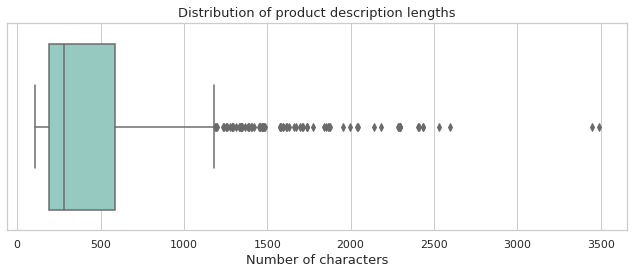

In [ ]:
# Boxplot of the distribution of lengths of product descriptions
boxplot = data.copy()
data['description'] = data['description'].astype('U')
boxplot['len'] = data.description.apply(lambda x: len(x))

# Figure
sns.set(style="whitegrid",rc={"font.size":13,"axes.labelsize":13})
plt.figure(figsize=(9, 4))
ax = sns.boxplot(x='len', data=boxplot, orient="h", palette="Set3")
plt.ylabel('')
plt.xlabel('Number of characters')
plt.title("Distribution of product description lengths", fontsize=13)
plt.tight_layout(h_pad=3)

In terms of the distribution of the word counts, it’s skewed positive. There are many outliers with the longest article having 3.5K words.

**Create the Word Cloud**


To view the most used words in the "description" variable, we will do a WorldCloud.

In [ ]:
# Import the wordcloud library
from wordcloud import WordCloud

# Instantiate a new wordcloud.
wordcloud = WordCloud(random_state = 8,
        normalize_plurals = False,
        width = 600, height= 300,
        max_words = 300,
        stopwords = [])

# Apply the wordcloud to the text.
text = data.description.values
wordcloud.generate((" ".join(text)))

Text(0.5, 1.0, "Most used terms in the 'description' variable")

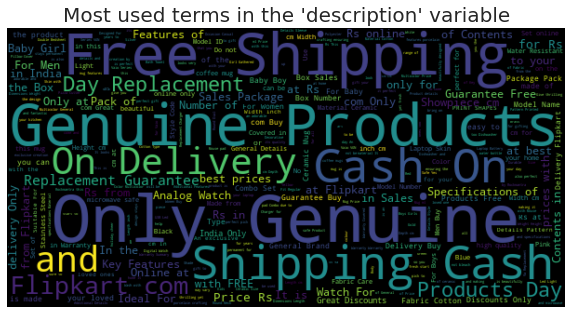

In [ ]:
# Create a figure
fig, ax = plt.subplots(1,1, figsize = (10,8))

# Add interpolation = bilinear to smooth things out
plt.imshow(wordcloud, interpolation='bilinear')

# And remove the axis
plt.axis("off")
plt.title("Most used terms in the 'description' variable", fontsize=20)

Now we are going to preprocess the different texts of our data in order to extract features.
In most cases for NLP, preprocessing consists of removing characters that are not letters like “#”, “-“, “!”, Numbers or even words that don't make sense or which are not part of the analyzed language.

We initialize:

. Stopwords are words that appear very frequently but do not add meaning to the sentence (like “de”, “le”, “une”)

. Words that come from an English dictionary (directly integrated into the nltk library)

. A lemmatizer, this object allows us to preserve the root of words so that two words having the same root will be considered as one and the same word (example: "neighbor" and "neighborhood" will both change to "neighbor")

In [ ]:
stopwords = nltk.corpus.stopwords.words('english')
words = set(nltk.corpus.words.words())
lemmatizer = WordNetLemmatizer()

Then we build our preprocessing function which goes successively:

. Remove punctuation

. Remove the numbers

. Transform the sentences into a list of tokens (into a list of words)

. Remove stopwords (meaningless words)

. Lemmatizer

. Remove capital letters

. Reform sentences with remaining words

In [ ]:
def Preprocess_listofSentence(listofSentence):

 preprocess_list = []
 for sentence in listofSentence :
  sentence_w_punct = "".join([i.lower() for i in sentence 
                              if i not in string.punctuation])

  sentence_w_num = ''.join(i for i in sentence_w_punct if not i.isdigit())

  tokenize_sentence = nltk.tokenize.word_tokenize(sentence_w_num)

  words_w_stopwords = [i for i in tokenize_sentence if i not in stopwords]

  words_lemmatize = (lemmatizer.lemmatize(w) for w in words_w_stopwords)

  sentence_clean = ' '.join(w for w in words_lemmatize 
                           if w.lower() in words or not w.isalpha())

  preprocess_list.append(sentence_clean)

 return preprocess_list 

In [ ]:
preprocess_list_description = Preprocess_listofSentence(data['description'])

Then we can display an example of a cleaned sentence:

In [ ]:
# Display an example of data ['description'] after preprocessing
print('Basic sentence : '+data['description'][1])
print('Cleaned up sentence : '+preprocess_list_description[1])
print('Number of tokens in the test: {}'.format(len(
      preprocess_list_description[1])), '\n')

Basic sentence : Specifications of Sathiyas Cotton Bath Towel (3 Bath Towel, Red, Yellow, Blue) Bath Towel Features Machine Washable Yes Material Cotton Design Self Design General Brand Sathiyas Type Bath Towel GSM 500 Model Name Sathiyas cotton bath towel Ideal For Men, Women, Boys, Girls Model ID asvtwl322 Color Red, Yellow, Blue Size Mediam Dimensions Length 30 inch Width 60 inch In the Box Number of Contents in Sales Package 3 Sales Package 3 Bath Towel
Cleaned up sentence : specification cotton bath towel bath towel red yellow blue bath towel feature machine washable yes material cotton design self design general brand type bath towel model name cotton bath towel ideal men woman boy girl model id color red yellow blue size dimension length inch width inch box number content sale package sale package bath towel
Number of tokens in the test: 342 



### **Modeling**

**Bag of words**

Bag-of-Words is a method that describes the occurrence of words within a document. A bigram is a pair of words that follow each other in the text, we can find them easily thanks to NLTK:

In [ ]:
list(nltk.bigrams(preprocess_list_description))

[('key feature elegance polyester multicolor abstract eyelet door curtain floral polyester multicolor abstract eyelet door curtain height pack price r curtain look curtain made high quality polyester feature eyelet style stitch metal make room environment romantic curtain ant wrinkle anti shrinkage elegant home bright modernistic appeal design attention sure steal heart contemporary eyelet valance curtain slide smoothly draw apart first thing morning welcome bright sun ray want wish good morning whole world draw close evening create special moment joyous beauty given soothing print bring home elegant curtain softly filter light room get right amount elegance polyester multicolor abstract eyelet door curtain height pack general brand elegance designed door type eyelet model name abstract polyester door curtain set model id duster color multicolor dimension length box number content sale package pack sale package curtain body design material polyester',
  'specification cotton bath towel

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()


# Build a BOW representation for the corpus
bow_rep = count_vect.fit_transform(preprocess_list_description)

# Look at the vocabulary mapping
print("Our vocabulary: ", count_vect.vocabulary_)

Our vocabulary:  {'key': 1470, 'feature': 1022, 'elegance': 886, 'polyester': 2002, 'multicolor': 1747, 'abstract': 11, 'eyelet': 993, 'door': 817, 'curtain': 684, 'floral': 1084, 'height': 1287, 'pack': 1874, 'price': 2052, 'look': 1584, 'made': 1617, 'high': 1298, 'quality': 2116, 'style': 2641, 'stitch': 2603, 'metal': 1685, 'make': 1627, 'room': 2274, 'environment': 926, 'romantic': 2272, 'ant': 107, 'wrinkle': 3048, 'anti': 110, 'shrinkage': 2436, 'elegant': 887, 'home': 1313, 'bright': 333, 'modernistic': 1715, 'appeal': 122, 'design': 754, 'attention': 169, 'sure': 2679, 'steal': 2591, 'heart': 1282, 'contemporary': 602, 'valance': 2896, 'slide': 2483, 'smoothly': 2501, 'draw': 824, 'apart': 119, 'first': 1060, 'thing': 2767, 'morning': 1730, 'welcome': 2991, 'sun': 2662, 'ray': 2153, 'want': 2962, 'wish': 3022, 'good': 1215, 'whole': 3004, 'world': 3038, 'close': 511, 'evening': 944, 'create': 657, 'special': 2548, 'moment': 1720, 'joyous': 1458, 'beauty': 240, 'given': 1192, '

In [ ]:
# See the BOW representation for first 2 documents
print("BoW representation for 'the first product': ", bow_rep[0].toarray())
print("BoW representation for 'the second product': ",bow_rep[1].toarray())

BoW representation for 'the first product':  [[0 0 0 ... 0 0 0]]
BoW representation for 'the second product':  [[0 0 0 ... 0 0 0]]


In [ ]:
# Dataframe as a Bag of Words
tokens = count_vect.get_feature_names()
bow_df = pd.DataFrame(bow_rep.toarray(), columns=tokens)
print(bow_df.shape)
bow_df.head(2)

(1050, 3072)


,aa,ability,able,abode,abrasion,abroad,absolute,absorbency,absorbent,absorber,absorbing,abstract,accent,access,accessory,accident,accidental,accommodate,according,ache,aching,acid,acne,across,acrylic,act,active,actu,actual,adapter,adaptor,add,added,addiction,addition,additional,additionally,adhesive,adjust,adjustable,...,woody,wool,word,work,working,workmanship,world,worn,worry,would,woven,wow,wrap,wrapped,wrapper,wring,wrinkle,wrist,write,wrought,yarn,year,yellow,yes,yet,yield,ym,york,youd,young,youth,youthful,youve,yr,zero,zinc,zip,zipper,zone,zoom
0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
new_data = pd.concat([data,bow_df], axis=1)
new_data.head(2)

,uniq_id,retail_price,discounted_price,images_data,is_FK_Advantage_product,description,cat_lvl_1,aa,ability,able,abode,abrasion,abroad,absolute,absorbency,absorbent,absorber,absorbing,abstract,accent,access,accessory,accident,accidental,accommodate,according,ache,aching,acid,acne,across,acrylic,act,active,actu,actual,adapter,adaptor,add,added,...,woody,wool,word,work,working,workmanship,world,worn,worry,would,woven,wow,wrap,wrapped,wrapper,wring,wrinkle,wrist,write,wrought,yarn,year,yellow,yes,yet,yield,ym,york,youd,young,youth,youthful,youve,yr,zero,zinc,zip,zipper,zone,zoom
0,55b85ea15a1536d46b7190ad6fff8ce7,1899.0,899.0,55b85ea15a1536d46b7190ad6fff8ce7.jpg,False,Key Features of Elegance Polyester Multicolor ...,Home Furnishing,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,7b72c92c2f6c40268628ec5f14c6d590,600.0,449.0,7b72c92c2f6c40268628ec5f14c6d590.jpg,False,Specifications of Sathiyas Cotton Bath Towel (...,Baby Care,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


(1050, 170)


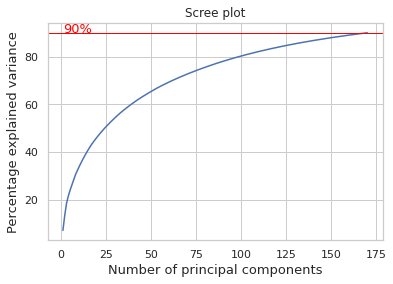

In [ ]:
# PCA reduction, 90% variance explained
pca = PCA(n_components=0.9, random_state=22)
pca.fit(bow_df)
x = pca.transform(bow_df)
print(x.shape)

# Scree plot
scree = pca.explained_variance_ratio_*100
plt.plot(np.arange(len(scree))+1, scree.cumsum()) #,c="red",marker='o')
plt.xlabel("Number of principal components")
plt.ylabel("Percentage explained variance")
plt.axhline(90, lw=1, c='red')
plt.text(1, 90, '90%', c='red')
plt.title("Scree plot")
plt.show(block=False)

# t-SNE reduction
dict_tsne_results = {}
tsne = TSNE(n_components=2, perplexity=30, n_iter=1000, random_state=1)
tsne_results = tsne.fit_transform(x)
dict_tsne_results['text_BOW'] = tsne_results

The number of principal components, from which to add a new principal component does not make much difference is 170.

To cluster the data we will use K-Means, who is a simple unsupervised machine learning algorithm that groups data 
into the number  K  of clusters specified by the user, even if it is not the 
optimal number of clusters for the dataset.

In [ ]:
# Clustering
kmeans = KMeans(n_clusters=data['cat_lvl_1'].nunique(), random_state=22)
kmeans.fit(tsne_results)            
y_pred =  kmeans.labels_
dict_y_pred = {}
dict_y_pred['text_BOW'] = y_pred

In [ ]:
def visualization(tsne_results, y_pred):    
    # 2D visualization of y_pred and y_true
    fig = plt.figure(1, figsize=(20, 8))
    plt.suptitle("Cluster visualization", fontsize=25, fontweight='bold')

    # Plot 1
    plt.subplot(1, 2, 1)

    X_normalized = MinMaxScaler().fit_transform(tsne_results)
    y_true =  data['cat_lvl_1'].values

    cmap = plt.cm.get_cmap("jet")
    digits = np.unique(y_true)
    for i, digit in enumerate(digits):
        sns.scatterplot(X_normalized[y_true == digit, 0],
                        X_normalized[y_true == digit, 1],
                        c=[cmap(i / 7)],
                        label=digit)

    plt.xlabel("Composante 1")
    plt.ylabel("Composante 2")
    plt.title("y_true", fontsize=15)

    # Plot 2
    plt.subplot(1, 2, 2)

    cmap = plt.cm.get_cmap("jet")
    digits = np.unique(y_pred)
    for i, digit in enumerate(digits):
        sns.scatterplot(X_normalized[y_pred == digit, 0],
                        X_normalized[y_pred == digit, 1],
                        c=[cmap(i / 7)],
                        label=digit)

    plt.xlabel("Component 1")
    plt.ylabel("Component 2")
    plt.title("y_pred", fontsize=15)

    plt.show()

    result_1 = adjusted_rand_score(data['cat_lvl_1'], kmeans.labels_)
    print('ARI = {}'.format(result_1))
    result_2 = homogeneity_score(data['cat_lvl_1'], kmeans.labels_)
    print('Homogeneity_score = {}'.format(result_2))
    result_3 = silhouette_score(X_normalized, kmeans.labels_)
    print('Silhouette Coefficient = {}'.format(result_3))

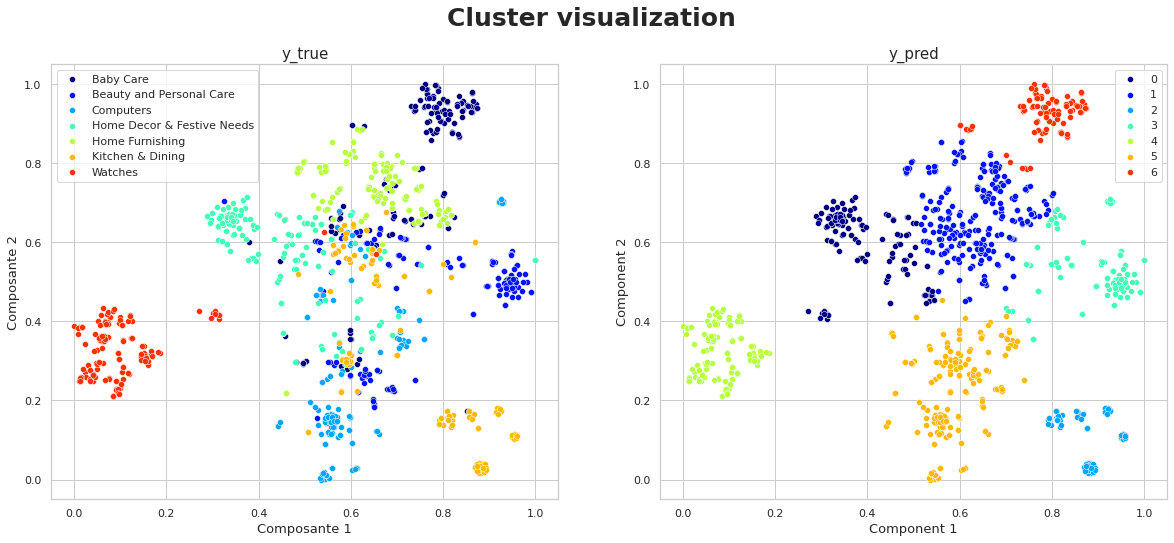

ARI = 0.40923363653444156
Homogeneity_score = 0.5176391779790274
Silhouette Coefficient = 0.5093981623649597


In [ ]:
visualization(tsne_results, y_pred)

We notice that the model succeeds in segmenting categories such as 'Baby care', 'Computers', 'Beauty and personal care' and 'watches'. It is less efficient for categories that have similar characteristics such as 'Home decor', 'Home furnishing' and 'Kitchen and dining'.


* Adjusted Rand Index (ARI) computes a similarity measure between two clusterings by considering all pairs of samples and counting pairs that are assigned in the same or different clusters in the predicted and true clusterings.
ARI should be interpreted as follows:

   ARI >= 0.90 excellent recovery; 0.80 =< ARI < 0.90 good recovery; 0.65    =<      ARI < 0.80 moderate recovery; ARI < 0.65 poor recovery.

* Accuracy - Accuracy is the most intuitive performance measure and it is simply a ratio of correctly predicted observation to the total observations. One may think that, if we have high accuracy then our model is best. Yes, accuracy is a great measure but only when you have symmetric datasets where values of false positive and false negatives are almost same. 

* Homogeneity_score : A clustering result satisfies homogeneity if all of its clusters contain only data points which are members of a single class.

* Silhouette Coefficient  is a measure of the quality of a partition of a set of data in automatic classification. For each point, its silhouette coefficient is the difference between the average distance with the points of the same group as it (cohesion) and the average distance with the points of the other neighboring groups (separation). If this difference is negative, the point is on average closer to the neighboring group than to its own: it is therefore poorly classified. Conversely, if this difference is positive, the point is on average closer to its group than to the neighboring group: it is therefore well classified.

The silhouette coefficient itself is the average of the silhouette coefficient for all points.

We notice a bad ARI and average homogeneity score and silhouette coefficient.

**TF-IDF**

In the first approache we’ve seen so far, all the words in the text are treated as
equally important—there’s no notion of some words in the document being more
important than others. TF-IDF, or term frequency–inverse document frequency,
addresses this issue. It aims to quantify the importance of a given word relative to
other words in the document and in the corpus. It’s a commonly used representation
scheme for information-retrieval systems, for extracting relevant documents from a
corpus for a given text query.

In [ ]:
tfidf = TfidfVectorizer()
bow_rep_tfidf = tfidf.fit_transform(preprocess_list_description)

# IDF for all words in the vocabulary
print(tfidf.idf_) 

# All words in the vocabulary
print(tfidf.get_feature_names()) 


[6.85888508 6.85888508 6.34805946 ... 6.85888508 6.85888508 7.26435019]
['aa', 'ability', 'able', 'abode', 'abrasion', 'abroad', 'absolute', 'absorbency', 'absorbent', 'absorber', 'absorbing', 'abstract', 'accent', 'access', 'accessory', 'accident', 'accidental', 'accommodate', 'according', 'ache', 'aching', 'acid', 'acne', 'across', 'acrylic', 'act', 'active', 'actu', 'actual', 'adapter', 'adaptor', 'add', 'added', 'addiction', 'addition', 'additional', 'additionally', 'adhesive', 'adjust', 'adjustable', 'admiration', 'admired', 'adorable', 'adorn', 'advance', 'advice', 'advisable', 'aero', 'affect', 'affordable', 'afternoon', 'age', 'ageless', 'aid', 'air', 'airport', 'airtight', 'al', 'alarm', 'alcohol', 'alive', 'allover', 'allow', 'alloy', 'alluring', 'ally', 'almond', 'almost', 'aloe', 'along', 'alpha', 'alphabet', 'also', 'alteration', 'alternative', 'alternatively', 'although', 'altimeter', 'altitude', 'aluminium', 'aluminum', 'always', 'amaze', 'amazed', 'amazing', 'amber', 'a

In [ ]:
print("Tfidf representation for 'list_description':\n", bow_rep_tfidf.toarray())

Tfidf representation for 'list_description':
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [ ]:
# Dataframe in TF-IDF form
tokens = tfidf.get_feature_names()
tfidf_df = pd.DataFrame(bow_rep_tfidf.toarray(), columns=tokens)
print(tfidf_df.shape)
tfidf_df.head(2)

(1050, 3072)


,aa,ability,able,abode,abrasion,abroad,absolute,absorbency,absorbent,absorber,absorbing,abstract,accent,access,accessory,accident,accidental,accommodate,according,ache,aching,acid,acne,across,acrylic,act,active,actu,actual,adapter,adaptor,add,added,addiction,addition,additional,additionally,adhesive,adjust,adjustable,...,woody,wool,word,work,working,workmanship,world,worn,worry,would,woven,wow,wrap,wrapped,wrapper,wring,wrinkle,wrist,write,wrought,yarn,year,yellow,yes,yet,yield,ym,york,youd,young,youth,youthful,youve,yr,zero,zinc,zip,zipper,zone,zoom
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.180989,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.060604,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.079187,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.199818,0.077029,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


(1050, 381)


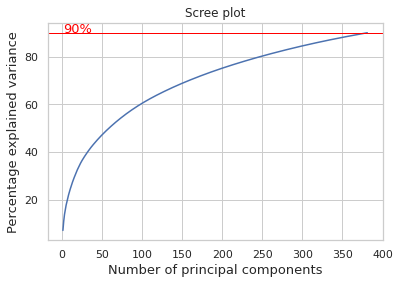

In [ ]:
# PCA reduction, 90% variance explained
pca = PCA(n_components=0.9, random_state=22)
pca.fit(tfidf_df)
x = pca.transform(tfidf_df)
print(x.shape)

# Scree plot
scree = pca.explained_variance_ratio_*100
plt.plot(np.arange(len(scree))+1, scree.cumsum()) #,c="red",marker='o')
plt.xlabel("Number of principal components")
plt.ylabel("Percentage explained variance")
plt.axhline(90, lw=1, c='red')
plt.text(1, 90, '90%', c='red')
plt.title("Scree plot")
plt.show(block=False)

# t-SNE reduction
dict_tsne_results = {}
tsne = TSNE(n_components=2, perplexity=30, n_iter=1000, random_state=1)
tsne_results = tsne.fit_transform(x)
dict_tsne_results['text_TF_IDF'] = tsne_results

The number of principal components, from which to add a new principal component does not make much difference is 381.

In [ ]:
# Clustering
kmeans = KMeans(n_clusters=data['cat_lvl_1'].nunique(), random_state=22)
kmeans.fit(tsne_results)            
y_pred =  kmeans.labels_
dict_y_pred['text_TF_IDF'] = y_pred

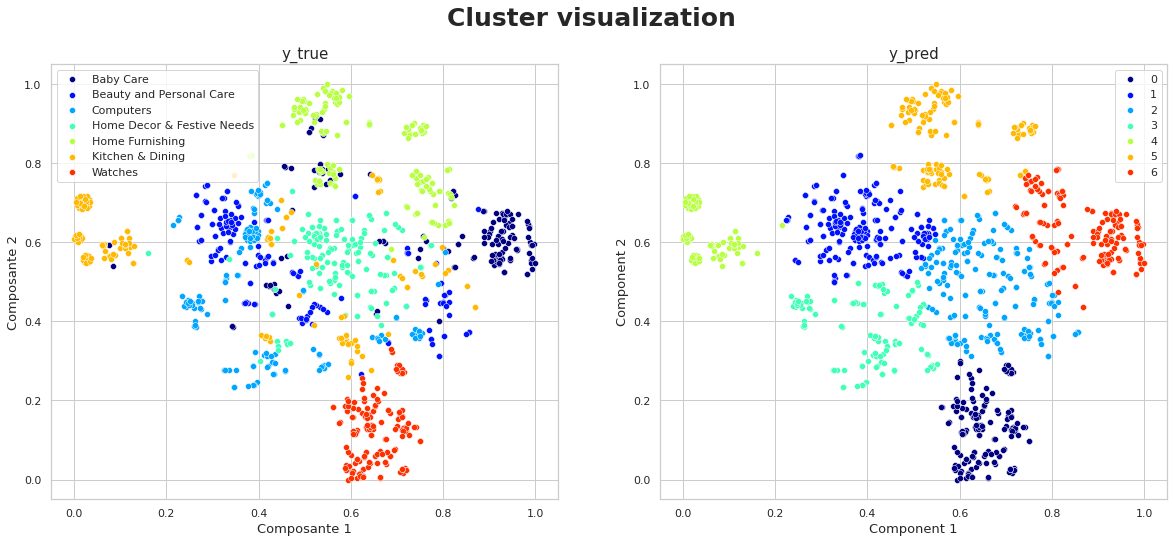

ARI = 0.4038455304653543
Homogeneity_score = 0.5024844311448999
Silhouette Coefficient = 0.45725685358047485


In [ ]:
visualization(tsne_results, y_pred)

We notice that this model succeeds in segmenting the categories 'Kitchen and dining', 'watches', and 'Home furnishing'. It is less efficient for the categories 'Home decor','Baby care', 'Computers', and 'Beauty and personal care'.


We notice scores very close to those found with the bag of words.

However, despite the fact that TF-IDF is better than
the vectorization methods we saw earlier in terms of capturing similarities between
words, it still suffers from the curse of high dimensionality.
To alleviate this, distributed representation schemes significantly
compress the dimensionality. This results in vectors that are compact
(i.e., low dimensional) and dense (i.e., hardly any zeros). The resulting vector
space is known as distributed representation.

**Word2Vec**

Word embedding is one of the most important techniques in natural language processing(NLP), where words are mapped to vectors of real numbers. Word embedding is capable of capturing the meaning of a word in a document, semantic and syntactic similarity, relation with other words. 

There are different bookstores for embedding.

Keras is particularly useful for this task because it allows you to train the embedding at the same time as the deep learning model.

The Gensim library is at least as interesting as Keras because it allows us to visualize this embedding.

That is to say, we will be able to analyze the embedding by looking at which word is similar to which other, for example.

For this embedding, our data must be in the form of tokens (each separate word) and not in the form of sentences.

In [ ]:
tokenize_sentences = []

for i in range(len(preprocess_list_description)):
 tokenize_sentences.append(nltk.tokenize.word_tokenize(
     preprocess_list_description[i]))

Word2vec ensures that the
learned word representations are low dimensional (vectors of dimensions 50–500,
instead of several thousands, as with previously studied representations in this chapter)
and dense (that is, most values in these vectors are non-zero). Such representations
make ML tasks more tractable and efficient

Then, we use the Word2Vec function from the Gensim library.

This function has five main parameters:

* size: The dimension of the vector created, ideally less than the number of words in the vocabulary

* window: The maximum distance between a target word and the words around the target word. The default window is 5.

* min_count: The minimum number of words to take into account when learning the model; words with an occurrence less than this number will be ignored. The default value for min_count is 5.

* worker: The number of batches created for training, by default there are 3.

First we initialize Word2Vec, then we train it on our data!

In [ ]:
from gensim.test.utils import common_texts
from gensim.models import Word2Vec

model_W2V = Word2Vec(sentences=tokenize_sentences, size=100, window=5,
                     min_count=10, workers=4)
model_W2V.train(tokenize_sentences, total_examples=len(tokenize_sentences),
                epochs=50)

(1456737, 2296250)

In [ ]:
# create a dictionary object with the output of th model
my_dict = dict({})
for idx, key in enumerate(model_W2V.wv.vocab):
    my_dict[key] = model_W2V.wv[key]

In [ ]:
my_dict_df = pd.DataFrame(my_dict)
my_dict_df.head(2)

,key,feature,elegance,polyester,multicolor,abstract,eyelet,door,curtain,floral,height,pack,price,r,look,made,high,quality,style,metal,make,room,elegant,home,bright,design,sure,contemporary,first,morning,good,whole,world,special,beauty,print,bring,light,get,right,...,ym,rectangular,rectangle,computer,brush,attachment,legging,bonsai,diaper,nylon,maroon,wow,playful,solar,taste,bazaar,gel,framed,canvas,wrap,blanket,mink,rice,attitude,harness,quirky,problem,glow,decker,hub,bank,trouser,luxury,ranging,fork,scissors,smoothing,glue,removal,gum
0,-0.077988,1.117563,0.588039,0.210450,-0.900380,0.155584,-0.576908,-0.682064,0.200421,-0.801096,-0.581097,-0.110185,1.059268,-0.647825,2.315510,0.847411,0.522512,1.126239,1.824645,0.611677,0.891249,1.013442,2.492377,0.649660,0.600744,0.921087,1.369973,0.269298,-0.176561,1.526790,0.429943,0.025324,-0.036349,1.445840,-1.387137,0.889869,0.749240,0.038379,1.563705,0.333821,...,-0.108276,0.262654,0.792077,-0.133247,-0.209817,-0.515578,-0.418818,-0.146799,-0.752559,0.296849,0.008440,-1.075832,0.386163,0.511825,0.945476,-0.613617,-1.270217,0.351690,0.526109,0.219513,-1.543399,-1.069813,-0.585059,0.996766,0.953367,0.720442,-0.728403,-0.700067,0.578833,-0.806155,0.069678,-0.537447,-0.255227,0.087526,0.014285,0.409894,-0.434473,-0.168136,-0.115843,0.644563
1,0.414855,0.126642,0.013066,-1.145346,-0.726319,-1.130882,-0.305668,0.220265,-0.023528,-1.371594,-0.055066,-0.525351,-0.233736,0.753303,-0.692556,1.060421,-0.704601,-0.313301,0.605388,-1.300896,1.005355,1.736092,-0.082531,0.528119,0.641871,0.868000,1.153181,-0.506462,0.591179,0.360304,1.274460,0.649623,0.402286,-0.467853,1.097479,0.411271,1.687662,-0.105184,0.536820,0.950411,...,-0.502902,-0.799842,-0.764199,1.609811,1.193598,1.960761,0.203092,0.486782,0.486722,-0.258589,-0.342721,-0.240480,-0.398752,0.752901,-0.007131,0.387881,0.397354,-0.679504,-1.390284,-0.641761,-0.625674,0.460079,-1.013262,0.331885,0.461628,-0.180190,0.908097,-0.302042,-0.124887,-0.178165,1.187900,-0.152134,0.400119,0.299985,-0.302594,0.455048,0.752081,0.671852,0.586585,0.416532


(100, 33)


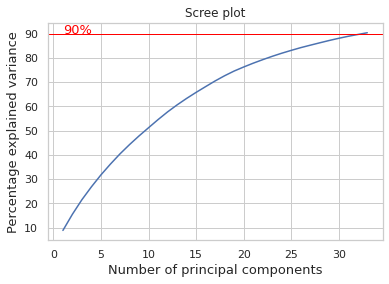

In [ ]:
# PCA reduction, 90% variance explained
pca = PCA(n_components=0.9, random_state=22)
pca.fit(my_dict_df)
x = pca.transform(my_dict_df)
print(x.shape)

# Scree plot
scree = pca.explained_variance_ratio_*100
plt.plot(np.arange(len(scree))+1, scree.cumsum()) #,c="red",marker='o')
plt.xlabel("Number of principal components")
plt.ylabel("Percentage explained variance")
plt.axhline(90, lw=1, c='red')
plt.text(1, 90, '90%', c='red')
plt.title("Scree plot")
plt.show(block=False)

# t-SNE reduction
dict_tsne_results = {}
tsne = TSNE(n_components=2, perplexity=30, n_iter=1000, random_state=1)
tsne_results = tsne.fit_transform(x)
dict_tsne_results['text_W2V'] = tsne_results

In [ ]:
# Sampling data
data1 = data.sample(n=100)

In [ ]:
# Clustering
kmeans = KMeans(n_clusters=data1['cat_lvl_1'].nunique(), random_state=22)
kmeans.fit(tsne_results)            
y_pred =  kmeans.labels_
dict_y_pred = {}
dict_y_pred['text_W2V'] = y_pred

In [ ]:
def visualization_W2V(tsne_results, y_pred):    
    # 2D visualization of y_pred and y_true
    fig = plt.figure(1, figsize=(20, 8))
    plt.suptitle("Cluster visualization", fontsize=25, fontweight='bold')

    # Plot 1
    plt.subplot(1, 2, 1)

    X_normalized = MinMaxScaler().fit_transform(tsne_results)
    y_true =  data1['cat_lvl_1'].values

    cmap = plt.cm.get_cmap("jet")
    digits = np.unique(y_true)
    for i, digit in enumerate(digits):
        sns.scatterplot(X_normalized[y_true == digit, 0],
                        X_normalized[y_true == digit, 1],
                        c=[cmap(i / 7)],
                        label=digit)

    plt.xlabel("Composante 1")
    plt.ylabel("Composante 2")
    plt.title("y_true", fontsize=15)

    # Plot 2
    plt.subplot(1, 2, 2)

    cmap = plt.cm.get_cmap("jet")
    digits = np.unique(y_pred)
    for i, digit in enumerate(digits):
        sns.scatterplot(X_normalized[y_pred == digit, 0],
                        X_normalized[y_pred == digit, 1],
                        c=[cmap(i / 7)],
                        label=digit)

    plt.xlabel("Component 1")
    plt.ylabel("Component 2")
    plt.title("y_pred", fontsize=15)

    plt.show()

    result_1 = adjusted_rand_score(data1['cat_lvl_1'], kmeans.labels_)
    print('ARI = {}'.format(result_1))
    result_2 = homogeneity_score(data1['cat_lvl_1'], kmeans.labels_)
    print('Homogeneity_score = {}'.format(result_2))
    result_3 = silhouette_score(X_normalized, kmeans.labels_)
    print('Silhouette Coefficient = {}'.format(result_3))

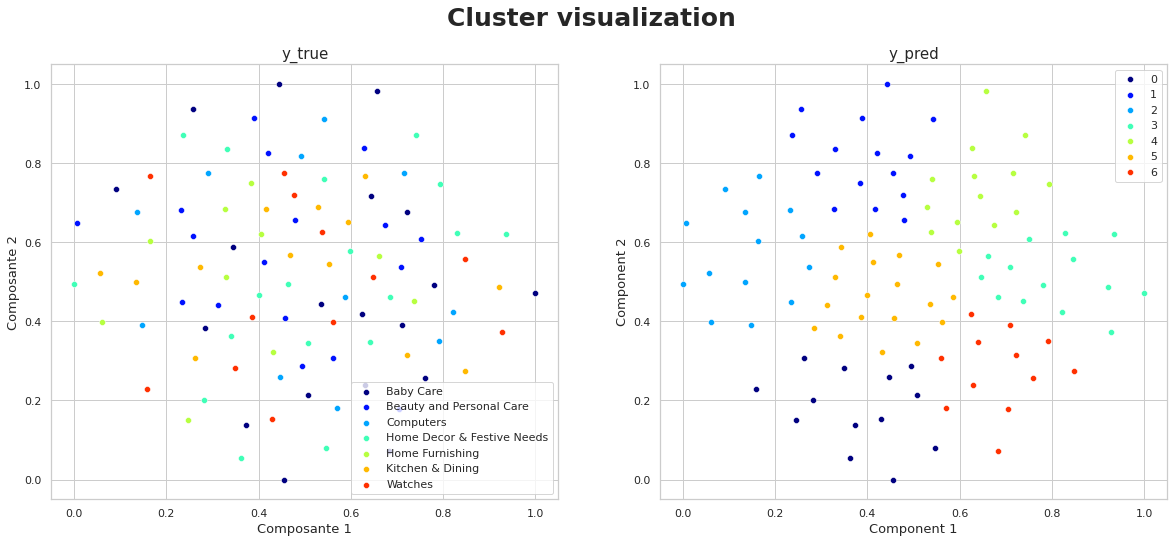

ARI = -0.02358887952822241
Homogeneity_score = 0.07031436996506556
Silhouette Coefficient = 0.3068751394748688


In [ ]:
visualization_W2V(tsne_results, y_pred)

The model fails to differentiate between the different clusters.

**Visualization**

The model learned the similarity of words based on the context of our sentences.

For example, we can see which word is similar to "fire" with the similar_by_word () function.

In [ ]:
model_W2V.similarity('watch', 'time')

0.5095626

In [ ]:
tokenize_sentences[0][100]

'curtain'

In [ ]:
model_W2V.similar_by_word(tokenize_sentences[0][100])[:10]

[('door', 0.7975748777389526),
 ('eyelet', 0.6889578700065613),
 ('aroma', 0.5589645504951477),
 ('maroon', 0.5109831094741821),
 ('window', 0.4935306906700134),
 ('quilt', 0.49196216464042664),
 ('polyester', 0.4881668984889984),
 ('comfort', 0.48442137241363525),
 ('craft', 0.4039694666862488),
 ('floral', 0.40052807331085205)]

This means that most of the time 'curtain' has been used alongside these words.

To better visualize this similarity we can use the following function:

In [ ]:
from sklearn.manifold import TSNE
from matplotlib import pyplot as plt

def display_closestwords_tsnescatterplot_perso(model, word):
 arr = np.empty((0,100), dtype='f')
 word_labels = [word]

 numb_sim_words = 10

 # get close words
 close_words = model.similar_by_word(word)[:numb_sim_words]

 # add the vector for each of the closest words to the array
 arr = np.append(arr, np.array([model[word]]), axis=0)
 for wrd_score in close_words:
  wrd_vector = model[wrd_score[0]]
  word_labels.append(wrd_score[0])
  arr = np.append(arr, np.array([wrd_vector]), axis=0)

 # find tsne coords for 2 dimensions
 tsne = TSNE(n_components=2, random_state=0)
 np.set_printoptions(suppress=True)
 Y = tsne.fit_transform(arr)

 x_coords = Y[:, 0]
 y_coords = Y[:, 1]

 # color for words
 color = ['red']
 for i in range(numb_sim_words):
  color.append('blue')

 # display scatter plot
 plt.scatter(x_coords, y_coords, c = color)

 for label, x, y in zip(word_labels, x_coords, y_coords):
  plt.annotate(label, xy=(x, y), xytext=(1, 10), textcoords='offset points')
 plt.xlim(min(x_coords)-100, max(x_coords)+100)
 plt.ylim(min(y_coords)-100, max(y_coords)+100)
 plt.show()

 print("Word most similar to : "+word)
 print([sim_word[0] for sim_word in close_words])

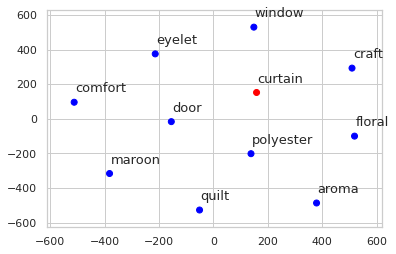

Word most similar to : curtain
['door', 'eyelet', 'aroma', 'maroon', 'window', 'quilt', 'polyester', 'comfort', 'craft', 'floral']


In [ ]:
display_closestwords_tsnescatterplot_perso(model_W2V, tokenize_sentences[0][100]
                                           )

Note that the words most similar to the searched word according to model_W2V are words of the same context.

## **Image preprocessing**

Now we are going to preprocess the images of our data in order to extract features.

**Visualizing Image Data**

In [ ]:
# Image path
path = "/content/drive/MyDrive/images/"

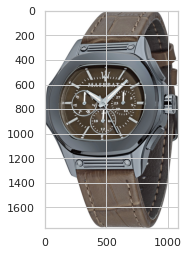

In [ ]:
# Image test
image_path_test = data['images_data'][5]
im_test = cv2.imread(os.path.join(path, image_path_test))
plt.imshow(im_test)

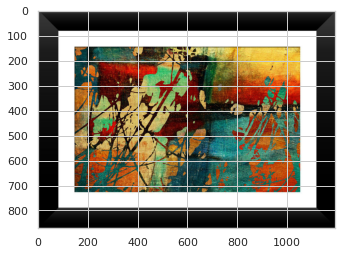

In [ ]:
path = '/content/drive/MyDrive/images/07912328f580cf080d721e6466287896.jpg'
image = imread(path)
plt.imshow(image)

**Pretreatment**

In [ ]:
def redim(array_im, width, height):

    '''Resizes the image corresponding to array_im
         in the defined width and height'''

    min_x = 100000
    max_x = 0
    min_y = 100000
    max_y = 0
    shape = array_im.shape
    if shape[0] < min_x:
        min_x = shape[0]
    elif shape[0] > max_x:
        max_x = shape[0]
    if shape[1] < min_y:
        min_y = shape[1]
    elif shape[1] > max_y:
        max_y = shape[1]
    im = cv2.resize(array_im, dsize=(width,height))
    del shape
    return im

In [ ]:
def preprocess(image, path=True):

    '''preprocessing of images:
    * Gaussian filter
    * histogram equalization
    * resizing
    takes an input the path to the image and output the np.array 
    matrix of the processed image
    '''

    # Opening the file
    if path == False: # If we have provided an array as input:
        im = image
    else: # If we provided a path to the input file:
        im = np.array(Image_PIL.open(image))
    
    # Greyscale
    im = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
    
    # Gaussian blur
    im = gaussian_filter(im, sigma=2)
    
    # Equalization
    im = cv2.equalizeHist(im)
    
    return redim(im, 128, 128)

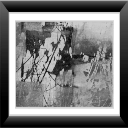

In [ ]:
Image_PIL.fromarray(preprocess('/content/drive/MyDrive/images/07912328f580cf080\
d721e6466287896.jpg', path=True))

**Scanning for matches**

In [ ]:
data['images_data'] = data['images_data'].apply(
    lambda x: '/content/drive/MyDrive/images/'+str(x))

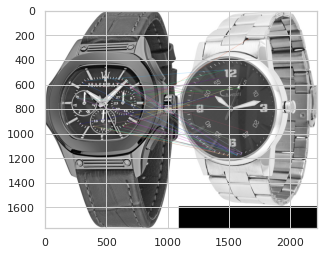

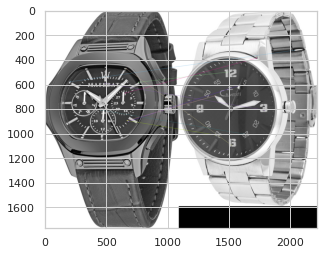

In [ ]:
# Load the images.
path_0 = data['images_data'][5]
path_1 = data['images_data'][6]

img0 = cv2.imread((os.path.join(path, path_0)), cv2.IMREAD_GRAYSCALE)
img1 = cv2.imread((os.path.join(path, path_1)), cv2.IMREAD_GRAYSCALE)

# Perform ORB feature detection and description.
orb = cv2.ORB_create()
kp0, des0 = orb.detectAndCompute(img0, None)
kp1, des1 = orb.detectAndCompute(img1, None)

# Perform brute-force KNN matching.
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=False)
pairs_of_matches = bf.knnMatch(des0, des1, k=2)

# Sort the pairs of matches by distance.
pairs_of_matches = sorted(pairs_of_matches, key=lambda x:x[0].distance)

# Draw the 25 best pairs of matches.
img_pairs_of_matches = cv2.drawMatchesKnn(
    img0, kp0, img1, kp1, pairs_of_matches[:25], img1,
    flags = cv2.DRAW_MATCHES_FLAGS_NOT_DRAW_SINGLE_POINTS)

# Show the pairs of matches.
plt.imshow(img_pairs_of_matches)
plt.show()

# Apply the ratio test.
matches = [x[0] for x in pairs_of_matches
           if len(x) > 1 and x[0].distance < 0.8 * x[1].distance]

# Draw the best 25 matches.
img_matches = cv2.drawMatches(
    img0, kp0, img1, kp1, matches[:25], img1,
    flags=cv2.DRAW_MATCHES_FLAGS_NOT_DRAW_SINGLE_POINTS)

# Show the matches.
plt.imshow(img_matches)
plt.show()

**Determination and display of ORB descriptors**

A number of algorithms can be used to detect and describe features, the most commonly used feature detection and descriptor
extraction algorithms in OpenCV are as follows:

* Harris: This algorithm is useful for detecting corners.

* SIFT: This algorithm is useful for detecting blobs.

* SURF: This algorithm is useful for detecting blobs.

* FAST: This algorithm is useful for detecting corners.

* BRIEF: This algorithm is useful for detecting blobs.

* ORB: This algorithm stands for Oriented FAST and Rotated BRIEF. It is useful for detecting a combination of corners and blobs.

Broadly speaking, a feature is an area of interest in the image that is
unique or easily recognizable. 
* Corners and regions with a high density of textural detail are
good features, while patterns that repeat themselves a lot and low-density regions (such as
a blue sky) are not. 
* Edges are good features as they tend to divide two regions of an image.
* A blob (a region of an image that greatly differs from its surrounding areas) is also an
interesting feature.

Most feature detection algorithms revolve around the identification of corners, edges, and
blobs, with some also focusing on the concept of a ridge, which you can conceptualize as
the axis of symmetry of an elongated object. (Think, for example, about identifying a road
in an image). ORB mixes the techniques used in the FAST keypoint detector and the BRIEF keypoint descriptor

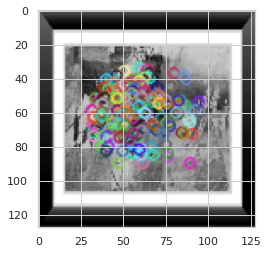

Descriptors :  (235, 32)

[[  7 193 173 ...  26 149 100]
 [  2 169  45 ...  76  55 250]
 [ 26 217 111 ...  23 181 250]
 ...
 [186  73 107 ... 130 244 106]
 [120 205  90 ...  42  56  10]
 [ 18  76  86 ...   8  37  11]]


In [ ]:
orb = cv2.ORB_create()
image = preprocess(
    '/content/drive/MyDrive/images/07912328f580cf080d721e6466287896.jpg', 
    path=True)
kp, des = orb.detectAndCompute(image, None)
img = cv2.drawKeypoints(image,kp,image)
plt.imshow(img)
plt.show()
print("Descriptors : ", des.shape)
print()
print(des)

**Saving image descriptors to file**

For each image,
* preprocessing

* creation of a list of descriptors by image which will be used to carry out the histograms by image

* creation of a list of descriptors for all the images ("liste_descriptors") which will be used to create the clusters of descriptors

In [ ]:
def create_features():
    '''Initializes an orb algorithm'''
    return cv2.ORB_create()
    

def features(orb, image):
    '''returns the keypoints and descriptors of 
       an image from the orb detector'''
    keypoints, descriptors = orb.detectAndCompute(image, None)
    return [keypoints, descriptors]

def pipeline_feature(image):
    '''complete processing of an image:
    * initializes the algorithm,
    * preprocess the image,
    * search for features
    * return the features'''
    
    orb = create_features()
    image = preprocess(image, path=True)
    keypoints, descriptors = features(orb, image)
    return keypoints, descriptors

We detect features, extract descriptors from each image in the dataset, and build a visual dictionary. Detecting features and extracting descriptors in an image can be done by using feature extractor algorithms (for example, SIFT, ORB, etc).

In [ ]:
j=0

max_count = len(data)
f = IntProgress(min=0, max=max_count) # Instantiate the bar
chaine = str(0)+'/'+str(max_count)
g = Text(value=chaine)
display(f) # Display the bar
display(g)
liste_keypoints = []
liste_descriptors = []
image_path_to_del = []
images = []

for image_path in data['images_data']:
    images.append(image_path)
    j+=1
    kea, des = pipeline_feature(image_path)
    liste_keypoints.append(kea)
    if des is not None : # If descriptor is different from None
       liste_descriptors.append((image_path, des))
    else :
        print("Descriptors of Image {} is None".format(image_path))
        image_path_to_del.append(image_path)      
data_ = data.drop(data[data['images_data']==image_path_to_del[0]].index) 
data_ = data_.drop(data[data['images_data']==image_path_to_del[1]].index) 
data_ = data_.drop(data[data['images_data']==image_path_to_del[2]].index) 
data_ = data_.drop(data[data['images_data']==image_path_to_del[3]].index) 

f.value = j # Signal to increment the progress bar
g.value =str(j)+'/'+str(max_count)

IntProgress(value=0, max=1050)

Text(value='0/1050')

Descriptors of Image /content/drive/MyDrive/images/f3ad282dac6ef0e30585a49ac67a322b.jpg is None
Descriptors of Image /content/drive/MyDrive/images/b5b47b2ecf5cf5760051b0a980ed7a3f.jpg is None
Descriptors of Image /content/drive/MyDrive/images/2a20862f02555a44b0ab301bed987a0b.jpg is None
Descriptors of Image /content/drive/MyDrive/images/eedee8680f0ed35dcf612c6774affe83.jpg is None


In [ ]:
data_.shape

(1046, 7)

In [ ]:
print('Number of keypoint list : ', len(liste_keypoints))
print('Number of keypoints for element 0: ', len(liste_keypoints[0]))
print('Number of keypoints for element 2 : ', len(liste_keypoints[2]))

Number of keypoint list :  1050
Number of keypoints for element 0:  217
Number of keypoints for element 2 :  203


**Stacking**

In [ ]:
# Vertical stacking of descriptors in a numpy array
descriptors = liste_descriptors[0][1]
for image_path, descriptor in liste_descriptors[1:] :
    descriptors = np.vstack((descriptors, descriptor))  

descriptors_float = descriptors.astype(float)  
print(descriptors_float.shape)
print(descriptors_float)

(155590, 32)
[[ 18.  34. 206. ...   2.  41. 136.]
 [ 18.  34. 222. ...   0.  41. 136.]
 [ 32. 162. 151. ...  40.  71. 164.]
 ...
 [ 50. 148. 119. ... 136. 229. 121.]
 [ 66. 106. 230. ... 134.  38.  61.]
 [218. 185. 190. ...   4. 189.  78.]]


**Creation of bags-of-features**

As its name suggests, a bag-of-features represents an image by a "bag" in which we have put its features in bulk. Mathematically, it is a vector created in two stages: first, we create the "visual words", then we build a histogram.
To create the "dictionary" of visual words, it suffices to apply a clustering algorithm to the feature descriptors built in the last step , such as k-means. The visual words then correspond to the centers of the clusters found.

Finally, for each image, we make frequency histogram from the vocabularies and the frequency of the vocabularies in the image. Those histograms are our bag of visual words (BOVW).

In [ ]:
# Construction of Bags Of Visual Words /
# histogram taking the form of a matrix
from scipy.cluster.vq import kmeans, vq

BOVW = {}
n_clusters = [70, 300, 400]

for n in n_clusters:
    voc, variance = kmeans(descriptors_float, n, 1) 
    print(n)
    
    BOVW[n] = np.zeros((len(liste_descriptors), n), "float32")
    for i in range(len(liste_descriptors)):
        words, distance = vq(liste_descriptors[i][1],voc)
        for w in words:
            BOVW[n][i][w] += 1


70
300
400


**T-SNE dimension reduction**

we will apply a PCA then TSNE:

* The PCA reduction makes it possible to create features that are decorrelated between them, and to reduce their dimension, while keeping a high level of explained variance (90%)
* The impact is better data separation via the T-SNE and a reduction in the processing time of the T-SNE

(1046, 50)


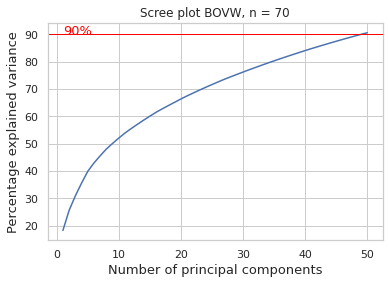

(1046, 195)


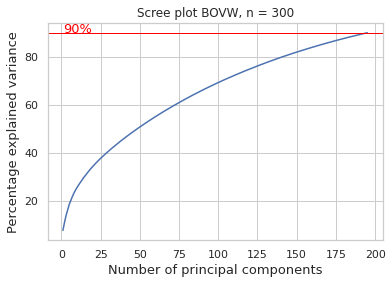

(1046, 245)


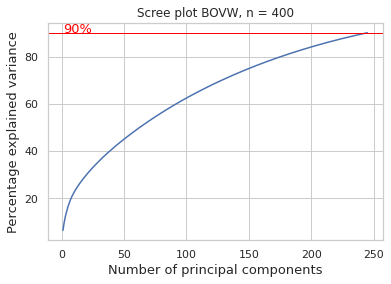

In [ ]:
# BOVW PCA / t-SNE reduction

tsne_results_BOVW = {}

for key, value in BOVW.items():
    pca = PCA(n_components=0.9, random_state=22)
    pca.fit(value)
    x = pca.transform(value)
    print(x.shape)

    # Scree plot
    scree = pca.explained_variance_ratio_*100
    plt.plot(np.arange(len(scree))+1, scree.cumsum())
    plt.xlabel("Number of principal components")
    plt.ylabel("Percentage explained variance")
    plt.axhline(90, lw=1, c='red')
    plt.text(1, 90, '90%', c='red')
    plt.title("Scree plot BOVW, n = {}".format(key))
    plt.show(block=False)

    tsne = TSNE(n_components=2, perplexity=30, n_iter=1000, random_state=1)
    tsne_results = tsne.fit_transform(x)
    
    tsne_results_BOVW[key] = tsne_results

In [ ]:
score = {}
labels = {}

for key, value in tsne_results_BOVW.items():

    kmeans = KMeans(n_clusters=data_['cat_lvl_1'].nunique(), random_state=22)
    kmeans.fit(value)
    labels[key] = kmeans.labels_
    print('nombre de visual words = {}'.format(key))
    score[key] = adjusted_rand_score(data_['cat_lvl_1'], kmeans.labels_)
    print('ARI = {}'.format(score[key]))
    print('\n')

nombre de visual words = 70
ARI = 0.03623468061607726


nombre de visual words = 300
ARI = 0.021537862825340058


nombre de visual words = 400
ARI = 0.0200797723140334




In [ ]:
# Dict score key with maximum value
key_max = max(score, key=score.get)
print('ARI_max = {}'.format(score[key_max]))

# Result storage
dict_y_pred = {}
dict_y_pred['img_BOVW'] = labels[key_max]

dict_tsne_results = {}
dict_tsne_results['img_BOVW']=tsne_results_BOVW[key_max]

ARI_max = 0.03623468061607726


In [ ]:
data_['labels'] = labels[key_max]

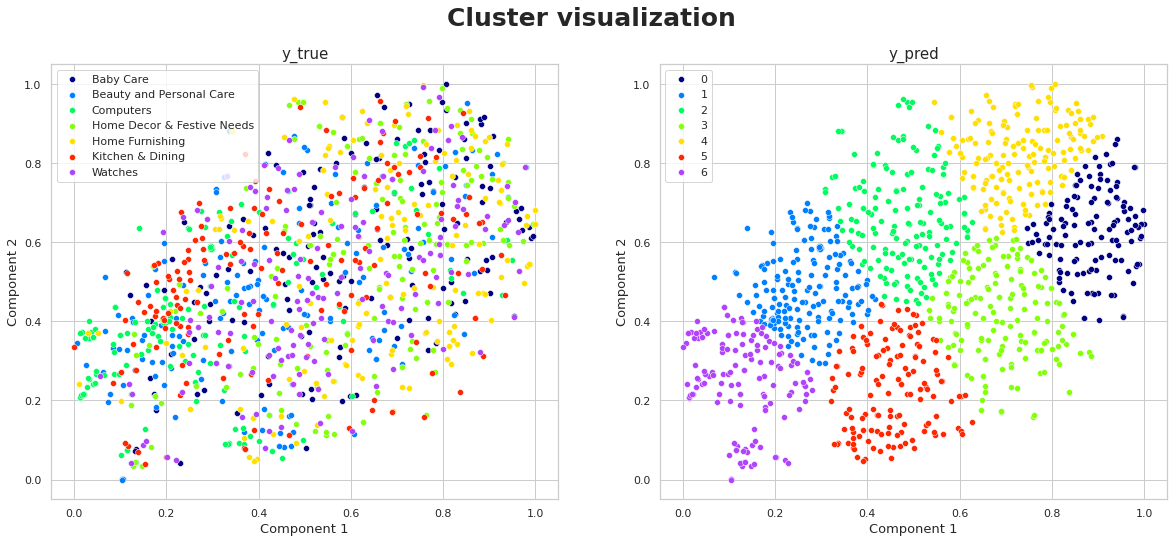

ARI = 0.03623468061607726
Homogeneity_score = 0.06394277289530463
Silhouette Coefficient = 0.33259114623069763


In [ ]:
# 2D visualization of y_pred and y_true
fig = plt.figure(1, figsize=(20, 8))
plt.suptitle("Cluster visualization", fontsize=25, fontweight='bold')

# Plot 1
plt.subplot(1, 2, 1)

X_normalized = MinMaxScaler().fit_transform(tsne_results_BOVW[key_max])
y_true =  data_['cat_lvl_1'].values


cmap = plt.cm.get_cmap("gist_ncar")
digits = np.unique(y_true)
for i, digit in enumerate(digits):
    sns.scatterplot(X_normalized[y_true == digit, 0],
                    X_normalized[y_true == digit, 1],
                    c=[cmap(i / 7)],
                    label=digit)

plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.title("y_true", fontsize=15)

# Plot 2
plt.subplot(1, 2, 2)

y_pred = kmeans.labels_
cmap = plt.cm.get_cmap("gist_ncar")
digits = np.unique(y_pred)
for i, digit in enumerate(digits):
    sns.scatterplot(X_normalized[labels[key_max] == digit, 0],
                    X_normalized[labels[key_max] == digit, 1],
                    c=[cmap(i / 7)],
                    label=digit)

plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.title("y_pred", fontsize=15)

plt.show()


result_1 = adjusted_rand_score(data_['cat_lvl_1'], labels[key_max])
print('ARI = {}'.format(result_1))
result_2 = homogeneity_score(data_['cat_lvl_1'], labels[key_max])
print('Homogeneity_score = {}'.format(result_2))
result_3 = silhouette_score(X_normalized, labels[key_max])
print('Silhouette Coefficient = {}'.format(result_3))

The model fails to segment any category as seen in the figure on the left, all the points overlap.

The values ​​of searched metrics, also show bad values.

**Transfer learning : convolutional-neural-network-models**


Transfer learning generally refers to a process where a model trained on one problem is used in some way on a second related problem.

In deep learning, transfer learning is a technique whereby a neural network model is first trained on a problem similar to the problem that is being solved. One or more layers from the trained model are then used in a new model trained on the problem of interest.

In our example, we will use the algorithm VGG16. 

**Step 1 : Training the VGG16 pre-trained model**

In [ ]:
# Load model 
from keras.applications.vgg16 import VGG16

model = VGG16()
# Summarize the model
model.summary()

553476096/553467096 [==============================] - 5s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                            

In [ ]:
# Remove the output layer
model = Model(inputs=model.inputs, outputs=model.layers[-2].output)

**Step 2 : Image pre-processing**


In [ ]:
# Feature extraction function
def extract_features(file, model):
    
    # Load the image as a 224x224 array
    img = load_img(file, target_size=(224,224)) 
    # VGG model expects the images it receives to be 224x224 NumPy arrays
    
    # Convert from 'PIL.Image.Image' to numpy array
    img = np.array(img) 
    
    # Reshape the data for the model reshape(num_of_samples, dim 1, dim 2, channels)
    reshaped_img = img.reshape(1,224,224,3) 
    
    # Prepare image for model
    imgx = preprocess_input(reshaped_img)
    
    # Get the feature vector
    features = model.predict(imgx, use_multiprocessing=True)
    return features

In [ ]:
new_data['images_data'] = new_data['images_data'].apply(lambda 
                          x: '/content/drive/MyDrive/images/' 
                          +str(x))

In [ ]:
dictionary = {}

# Iterate through the image list
for image in new_data['images_data']:
    # Extracting features and adding to dictionaries
    feat = extract_features(image,model)
    dictionary[image] = feat
        
# List of file names
filenames = np.array(list(dictionary.keys()))

# Feature list
feat = np.array(list(dictionary.values()))
print(feat.shape)
print(feat)       

(1050, 1, 4096)
[[[3.398615   0.8595723  0.         ... 0.         0.8510543  0.        ]]

 [[0.         0.         0.         ... 0.         0.         0.        ]]

 [[0.         0.         0.         ... 1.2971003  0.         0.        ]]

 ...

 [[2.1961303  2.3982742  2.62364    ... 2.1598725  0.18472248 0.        ]]

 [[0.         0.         0.         ... 0.         0.24832991 0.92513794]]

 [[0.         0.         0.12313202 ... 0.         0.52771646 2.9917486 ]]]


In [ ]:
feat.shape

(1050, 1, 4096)

In [ ]:
# Reshape so that there are 1050 samples of 4096 vectors
feat = feat.reshape(-1,4096)
print(feat.shape)

(1050, 4096)


(1050, 314)


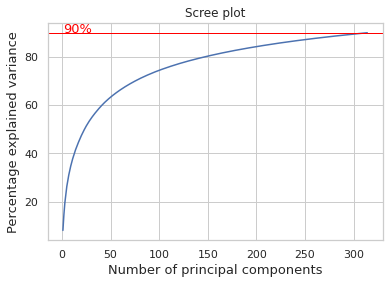

In [ ]:
# PCA reduction, 90% variance explained 
pca = PCA(n_components=0.9, random_state=22)
pca.fit(feat)
x = pca.transform(feat)
print(x.shape)

# Scree plot
scree = pca.explained_variance_ratio_*100
plt.plot(np.arange(len(scree))+1, scree.cumsum()) #,c="red",marker='o')
plt.xlabel("Number of principal components")
plt.ylabel("Percentage explained variance")
plt.axhline(90, lw=1, c='red')
plt.text(1, 90, '90%', c='red')
plt.title("Scree plot")
plt.show(block=False)

# t-SNE reduction
tsne = TSNE(n_components=2, perplexity=30, n_iter=1000, random_state=1)
tsne_results = tsne.fit_transform(x)

In [ ]:
# Clustering
kmeans = KMeans(n_clusters=data['cat_lvl_1'].nunique(), random_state=22)
kmeans.fit(tsne_results)            
y_pred =  kmeans.labels_

In [ ]:
def visualization(tsne_results, y_pred):    
    # 2D visualization of y_pred and y_true
    fig = plt.figure(1, figsize=(20, 8))
    plt.suptitle("Cluster visualization", fontsize=25, fontweight='bold')

    # Plot 1
    plt.subplot(1, 2, 1)

    X_normalized = MinMaxScaler().fit_transform(tsne_results)
    y_true =  new_data['cat_lvl_1'].values

    cmap = plt.cm.get_cmap("jet")
    digits = np.unique(y_true)
    for i, digit in enumerate(digits):
        sns.scatterplot(X_normalized[y_true == digit, 0],
                        X_normalized[y_true == digit, 1],
                        c=[cmap(i / 7)],
                        label=digit)

    plt.xlabel("Component 1")
    plt.ylabel("Component 2")
    plt.title("y_true", fontsize=15)

    # Plot 2
    plt.subplot(1, 2, 2)

    cmap = plt.cm.get_cmap("jet")
    digits = np.unique(y_pred)
    for i, digit in enumerate(digits):
        sns.scatterplot(X_normalized[y_pred == digit, 0],
                        X_normalized[y_pred == digit, 1],
                        c=[cmap(i / 7)],
                        label=digit)

    plt.xlabel("Component 1")
    plt.ylabel("Component 2")
    plt.title("y_pred", fontsize=15)

    plt.show()

    result_1 = adjusted_rand_score(new_data['cat_lvl_1'], kmeans.labels_)
    print('ARI = {}'.format(result_1))
    result_2 = homogeneity_score(new_data['cat_lvl_1'], kmeans.labels_)
    print('Homogeneity_score = {}'.format(result_2))
    result_3 = silhouette_score(X_normalized, kmeans.labels_)
    print('Silhouette Coefficient = {}'.format(result_3))

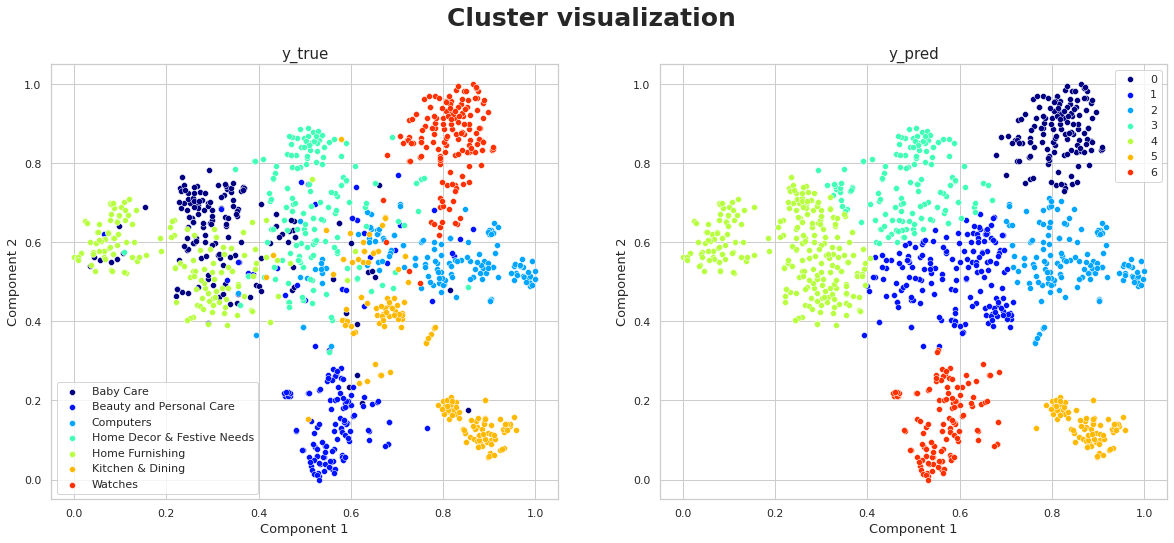

ARI = 0.4969113656693062
Homogeneity_score = 0.5888418051537412
Silhouette Coefficient = 0.4722939729690552


In [ ]:
visualization(tsne_results, y_pred)

We notice that the clustering is much improved. Some categories are very well segmented like 'Watches', 'beauty and personal care' and 'kitchen and dining'.

____

## **Clustering on all data**

Now we will cluster on the set of textual data and image descriptors.

In [ ]:
VGG16_df = pd.DataFrame(feat)
VGG16_df.head(2)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,4056,4057,4058,4059,4060,4061,4062,4063,4064,4065,4066,4067,4068,4069,4070,4071,4072,4073,4074,4075,4076,4077,4078,4079,4080,4081,4082,4083,4084,4085,4086,4087,4088,4089,4090,4091,4092,4093,4094,4095
0,3.398615,0.859572,0.0,1.10656,2.266121,2.927242,2.446448,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.559278,0.0,0.000000,0.00000,0.246029,1.012809,4.723427,0.0,0.000000,0.0,1.527077,0.0,1.475293,0.727806,0.0,0.000000,0.0,1.122838,0.0,0.0,0.0,3.408424,1.094498,1.497917,0.0,0.0,...,0.0,1.094121,0.84677,0.0,0.078696,0.0,0.0,0.0,0.156240,0.598004,0.000000,0.0,0.0,2.785859,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.160063,2.212538,0.0,1.625093,0.00000,4.446727,0.485876,0.0,0.0,0.472938,0.875755,0.783684,0.0,0.0,0.851054,0.0
1,0.000000,0.000000,0.0,1.17201,0.000000,0.000000,0.000000,0.0,0.0,6.4998,0.0,0.0,0.0,0.0,0.000000,0.0,0.594587,2.79611,0.000000,0.998301,0.000000,0.0,0.474827,0.0,0.000000,0.0,0.000000,12.447857,0.0,0.228287,0.0,3.627892,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,...,0.0,0.203040,0.00000,0.0,2.104987,0.0,0.0,0.0,5.899362,0.000000,4.096224,0.0,0.0,0.000000,0.0,0.0,3.525044,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.355567,0.000000,0.0,3.272353,1.54765,0.000000,1.169695,0.0,0.0,0.000000,0.000000,3.152506,0.0,0.0,0.000000,0.0


In [ ]:
new_data_ = pd.concat([bow_df,VGG16_df], axis=1)
new_data_.head(2)

,aa,ability,able,abode,abrasion,abroad,absolute,absorbency,absorbent,absorber,absorbing,abstract,accent,access,accessory,accident,accidental,accommodate,according,ache,aching,acid,acne,across,acrylic,act,active,actu,actual,adapter,adaptor,add,added,addiction,addition,additional,additionally,adhesive,adjust,adjustable,...,4056,4057,4058,4059,4060,4061,4062,4063,4064,4065,4066,4067,4068,4069,4070,4071,4072,4073,4074,4075,4076,4077,4078,4079,4080,4081,4082,4083,4084,4085,4086,4087,4088,4089,4090,4091,4092,4093,4094,4095
0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,1.094121,0.84677,0.0,0.078696,0.0,0.0,0.0,0.156240,0.598004,0.000000,0.0,0.0,2.785859,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.160063,2.212538,0.0,1.625093,0.00000,4.446727,0.485876,0.0,0.0,0.472938,0.875755,0.783684,0.0,0.0,0.851054,0.0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.203040,0.00000,0.0,2.104987,0.0,0.0,0.0,5.899362,0.000000,4.096224,0.0,0.0,0.000000,0.0,0.0,3.525044,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.355567,0.000000,0.0,3.272353,1.54765,0.000000,1.169695,0.0,0.0,0.000000,0.000000,3.152506,0.0,0.0,0.000000,0.0


(1050, 326)


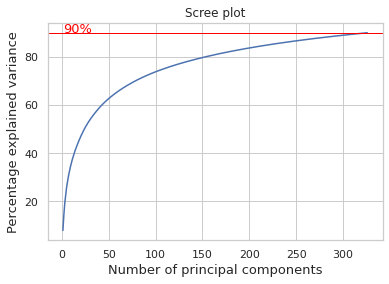

In [ ]:
# PCA reduction, 90% variance explained 
pca = PCA(n_components=0.9, random_state=22)
pca.fit(new_data_)
x = pca.transform(new_data_)
print(x.shape)

# Scree plot
scree = pca.explained_variance_ratio_*100
plt.plot(np.arange(len(scree))+1, scree.cumsum()) #,c="red",marker='o')
plt.xlabel("Number of principal components")
plt.ylabel("Percentage explained variance")
plt.axhline(90, lw=1, c='red')
plt.text(1, 90, '90%', c='red')
plt.title("Scree plot")
plt.show(block=False)

# t-SNE reduction
tsne = TSNE(n_components=2, perplexity=30, n_iter=1000, random_state=1)
tsne_results = tsne.fit_transform(x)

In [ ]:
# Clustering
kmeans = KMeans(n_clusters=data['cat_lvl_1'].nunique(), random_state=22)
kmeans.fit(tsne_results)            
y_pred =  kmeans.labels_

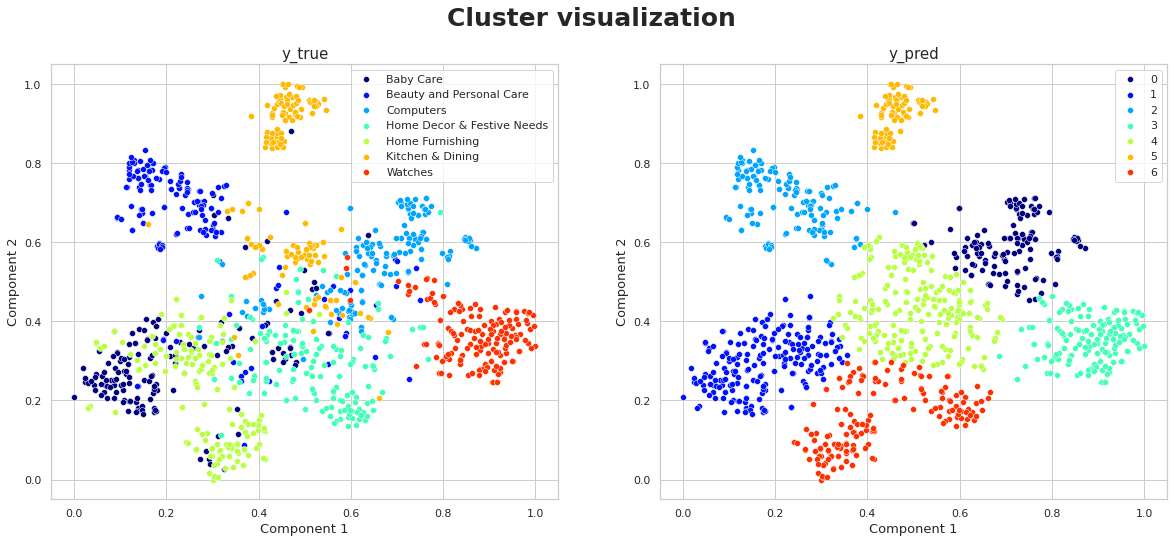

ARI = 0.453847284546831
Homogeneity_score = 0.5669040610550338
Silhouette Coefficient = 0.4860042333602905


In [ ]:
visualization(tsne_results, y_pred)

We notice that the clustering is improved. Some categories are very well segmented like 'Watches', 'beauty and personal care' and 'Computers'.

___

### **Results**

In [ ]:
dfARI = pd.DataFrame({'ARI' :["text_BOW","text_TF_IDF", "W2V", "ORB",
                              "VGG16", "text+image"],
                      'value':[0.41, 0.40, 0.019, 0.04, 0.49, 0.45]})

Text(0.5, 1.0, 'Results of ARI of the different methodologies')

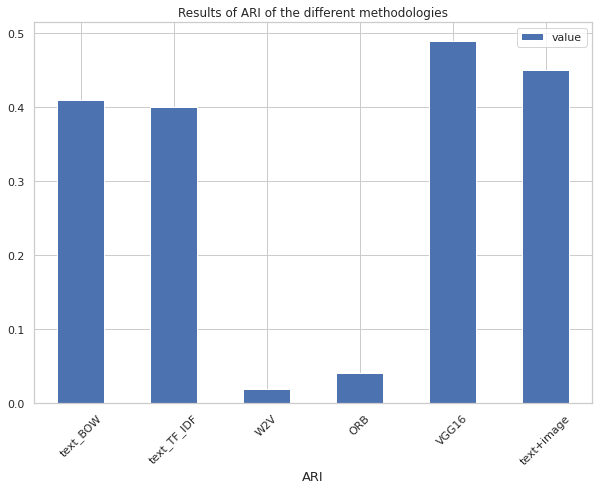

In [ ]:
# A simple line plot
dfARI.plot(kind='bar',x='ARI',y='value', rot=45, figsize=(10,7))
plt.title("Results of ARI of the different methodologies")

In [ ]:
dfHomogeneity = pd.DataFrame({'Homogeneity':["text_BOW","text_TF_IDF","W2V",
                                             "ORB","VGG16", "text+image"],
                              'value':[0.52, 0.5, 0.15, 0.068, 0.59, 0.57
                                       ]})

Text(0.5, 1.0, 'Results of Homogeneity the different methodologies')

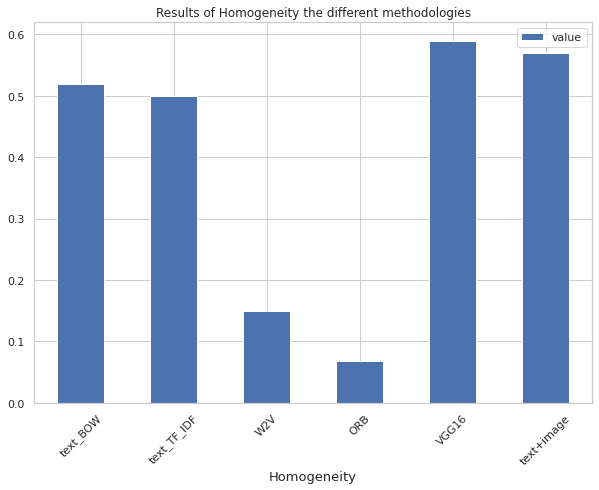

In [ ]:
from IPython.core.pylabtools import figsize
# A simple line plot
dfHomogeneity.plot(kind='bar',x='Homogeneity',y='value', rot=45, figsize=(10,7))
plt.title("Results of Homogeneity the different methodologies")

In [ ]:
dfsilhouette = pd.DataFrame({'silhouette':["text_BOW","text_TF_IDF", 
                                           "W2V", "ORB","VGG16", "text+image"],
                             'value':[0.51, 0.46, 0.36, 0.34, 0.47, 0.49]
                             })

Text(0.5, 1.0, 'Results of Silhouette coefficient the different methodologies')

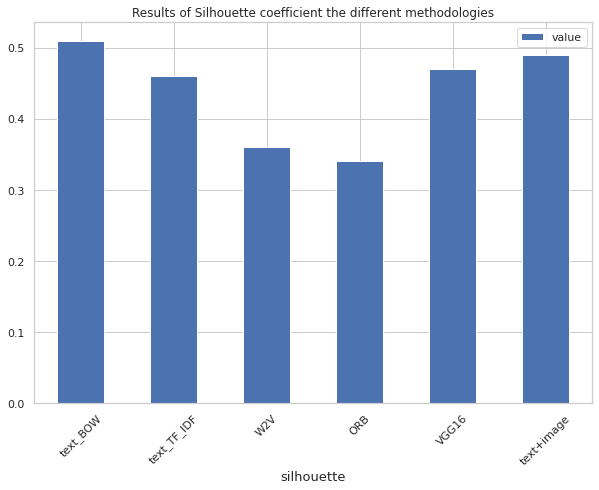

In [ ]:
# A simple line plot
dfsilhouette.plot(kind='bar',x='silhouette',y='value', rot=45, figsize=(10,7))
plt.title("Results of Silhouette coefficient the different methodologies")

It can be concluded that the best ARI score and homogeneity results are obtained with VGG16.